# Library

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import datetime

import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# model
import lightgbm as lgb

# shap
import shap

# my_tool
import sys
sys.path.append('../../')
import importlib
from utils import my_ds_tools as mdt
importlib.reload(mdt)

<module 'utils.my_ds_tools' from '../..\\utils\\my_ds_tools.py'>

# Config

In [25]:
VERSION = 'v1'
USAGE_TREE = 'tree'
USAGE_LINEAR = 'linear'
INPUT_DIR = '../intermediate/'

Y_COL = 'SalePrice'
DROP_COLS = ['Id']

# Load data

In [26]:
tree_train_df = pd.read_csv(INPUT_DIR + 'train_for_' + USAGE_TREE + '_' + VERSION + '.csv')
tree_test_df = pd.read_csv(INPUT_DIR + 'test_for_' + USAGE_TREE + '_' + VERSION + '.csv')

linear_train_df = pd.read_csv(INPUT_DIR + 'train_for_' + USAGE_LINEAR + '_' + VERSION + '.csv')
linear_test_df = pd.read_csv(INPUT_DIR + 'test_for_' + USAGE_LINEAR + '_' + VERSION + '.csv')

# Tree

## Preprocess

In [27]:
tree_feature_cols = [
#     'Unnamed: 0', 
#     'Id', 
#     'MSSubClass', 
    'MSZoning', 
#     'LotFrontage',
#     'LotArea',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
#     'OverallQual',
#     'OverallCond',
#     'YearBuilt',
#     'YearRemodAdd',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinSF1',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
#     '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'KitchenQual',
#     'TotRmsAbvGrd',
    'Functional',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'MiscVal',
#     'MoSold',
#     'YrSold',
#     'SaleType',
    'SaleCondition',
    'FixedMSSubClass',
    'FixedOverallQual',
    'FixedOverallCond',
    'LogLotArea',
    'LogFrontage',
    'IsRemod',
    'PastYears',
#     'SalePrice'
]
# train_df.columns

In [28]:
tree_x = tree_train_df.loc[:, tree_feature_cols]
tree_y = tree_train_df.loc[:, Y_COL]

In [29]:
tree_prepro_tool = mdt.DS_PREPROCESS(tree_x, tree_y)

In [30]:
tree_prepro_tool.show_desc_features()

Categorical
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']
Numerical
['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'FixedMSSubClass', 'FixedOverallQual', 'FixedOverallCond

In [31]:
tree_prepro_x = tree_prepro_tool.label_encode_x()
tree_prepro_tool.check_null_x(tree_prepro_x)

MSZoning               0
Street                 0
Alley                  0
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             8
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0
Electrical             0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0


In [32]:
tree_prepro_y = np.log(tree_y)
tree_prepro_y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(tree_prepro_x, tree_y)

## Calculate Model

In [49]:
model_tool = mdt.DS_MODEL()
model_list = [
    'lgb',
#     'dt',
#     'rf',
#     'rbf_svr',
#     'linear_svr',
    'vote'
]
for m in model_list:
    print(m)
    print('# not cv')
    model_tool.reg_fit_predict(x_train, x_test, y_train, y_test, m)
    print('# cv')
    model_tool.reg_fit_predict_cv(m, tree_x, tree_y)
    print('------------------------------------')

lgb
# not cv
MAE: 16273.5116
MAE/MEAN: 0.0917
RMSE: 23028.3521
RMSE/MEAN: 0.1298
# cv
mae: 16230.0431
mae_mean: 0.0897
rmse: 25288.7389
rmse_mean: 0.1396
------------------------------------
vote
# not cv
Caution: No models
# cv
Caution: No models
------------------------------------


# Linear

## Preprocess

In [80]:
linear_feature_cols = [
#     'Unnamed: 0',
#     'Id',
    'MSSubClass',
#     'LotFrontage',
#     'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
#     '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
#     'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
#     'GarageYrBlt',
    'GarageCars',
#     'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'IsRemod',
    'PastYears',
    'LogLotArea',
    'LogLotFrontage',
    'MSZoning_C (all)',
    'MSZoning_FV',
    'MSZoning_RH',
    'MSZoning_RL',
    'MSZoning_RM',
    'Street_Grvl',
    'Street_Pave',
    'Alley_Grvl',
    'Alley_Pave',
    'LotShape_IR1',
    'LotShape_IR2',
    'LotShape_IR3',
    'LotShape_Reg',
    'LandContour_Bnk',
    'LandContour_HLS',
    'LandContour_Low',
    'LandContour_Lvl',
    'Utilities_AllPub',
    'Utilities_NoSeWa',
    'LotConfig_Corner',
    'LotConfig_CulDSac',
    'LotConfig_FR2',
    'LotConfig_FR3',
    'LotConfig_Inside',
    'LandSlope_Gtl',
    'LandSlope_Mod',
    'LandSlope_Sev',
    'Neighborhood_Blmngtn',
    'Neighborhood_Blueste',
    'Neighborhood_BrDale',
    'Neighborhood_BrkSide',
    'Neighborhood_ClearCr',
    'Neighborhood_CollgCr',
    'Neighborhood_Crawfor',
    'Neighborhood_Edwards',
    'Neighborhood_Gilbert',
    'Neighborhood_IDOTRR',
    'Neighborhood_MeadowV',
    'Neighborhood_Mitchel',
    'Neighborhood_NAmes',
    'Neighborhood_NPkVill',
    'Neighborhood_NWAmes',
    'Neighborhood_NoRidge',
    'Neighborhood_NridgHt',
    'Neighborhood_OldTown',
    'Neighborhood_SWISU',
    'Neighborhood_Sawyer',
    'Neighborhood_SawyerW',
    'Neighborhood_Somerst',
    'Neighborhood_StoneBr',
    'Neighborhood_Timber',
    'Neighborhood_Veenker',
    'Condition1_Artery',
    'Condition1_Feedr',
    'Condition1_Norm',
    'Condition1_PosA',
    'Condition1_PosN',
    'Condition1_RRAe',
    'Condition1_RRAn',
    'Condition1_RRNe',
    'Condition1_RRNn',
    'Condition2_Artery',
    'Condition2_Feedr',
    'Condition2_Norm',
    'Condition2_PosA',
    'Condition2_PosN',
    'Condition2_RRAe',
    'Condition2_RRAn',
    'Condition2_RRNn',
    'BldgType_1Fam',
    'BldgType_2fmCon',
    'BldgType_Duplex',
    'BldgType_Twnhs',
    'BldgType_TwnhsE',
    'HouseStyle_1.5Fin',
    'HouseStyle_1.5Unf',
    'HouseStyle_1Story',
    'HouseStyle_2.5Fin',
    'HouseStyle_2.5Unf',
    'HouseStyle_2Story',
    'HouseStyle_SFoyer',
    'HouseStyle_SLvl',
    'RoofStyle_Flat',
    'RoofStyle_Gable',
    'RoofStyle_Gambrel',
    'RoofStyle_Hip',
    'RoofStyle_Mansard',
    'RoofStyle_Shed',
    'RoofMatl_CompShg',
    'RoofMatl_Membran',
    'RoofMatl_Metal',
    'RoofMatl_Roll',
    'RoofMatl_Tar&Grv',
    'RoofMatl_WdShake',
    'RoofMatl_WdShngl',
    'Exterior1st_AsbShng',
    'Exterior1st_AsphShn',
    'Exterior1st_BrkComm',
    'Exterior1st_BrkFace',
    'Exterior1st_CBlock',
    'Exterior1st_CemntBd',
    'Exterior1st_HdBoard',
    'Exterior1st_ImStucc',
    'Exterior1st_MetalSd',
    'Exterior1st_Plywood',
    'Exterior1st_Stone',
    'Exterior1st_Stucco',
    'Exterior1st_VinylSd',
    'Exterior1st_Wd Sdng',
    'Exterior1st_WdShing',
    'Exterior2nd_AsbShng',
    'Exterior2nd_AsphShn',
    'Exterior2nd_Brk Cmn',
    'Exterior2nd_BrkFace',
    'Exterior2nd_CBlock',
    'Exterior2nd_CmentBd',
    'Exterior2nd_HdBoard',
    'Exterior2nd_ImStucc',
    'Exterior2nd_MetalSd',
    'Exterior2nd_Other',
    'Exterior2nd_Plywood',
    'Exterior2nd_Stone',
    'Exterior2nd_Stucco',
    'Exterior2nd_VinylSd',
    'Exterior2nd_Wd Sdng',
    'Exterior2nd_Wd Shng',
    'MasVnrType_BrkCmn',
    'MasVnrType_BrkFace',
    'MasVnrType_None',
    'MasVnrType_Stone',
    'ExterQual_Ex',
    'ExterQual_Fa',
    'ExterQual_Gd',
    'ExterQual_TA',
    'ExterCond_Ex',
    'ExterCond_Fa',
    'ExterCond_Gd',
    'ExterCond_Po',
    'ExterCond_TA',
    'Foundation_BrkTil',
    'Foundation_CBlock',
    'Foundation_PConc',
    'Foundation_Slab',
    'Foundation_Stone',
    'Foundation_Wood',
    'BsmtQual_Ex',
    'BsmtQual_Fa',
    'BsmtQual_Gd',
    'BsmtQual_TA',
    'BsmtCond_Fa',
    'BsmtCond_Gd',
    'BsmtCond_Po',
    'BsmtCond_TA',
    'BsmtExposure_Av',
    'BsmtExposure_Gd',
    'BsmtExposure_Mn',
    'BsmtExposure_No',
    'BsmtFinType1_ALQ',
    'BsmtFinType1_BLQ',
    'BsmtFinType1_GLQ',
    'BsmtFinType1_LwQ',
    'BsmtFinType1_Rec',
    'BsmtFinType1_Unf',
    'BsmtFinType2_ALQ',
    'BsmtFinType2_BLQ',
    'BsmtFinType2_GLQ',
    'BsmtFinType2_LwQ',
    'BsmtFinType2_Rec',
    'BsmtFinType2_Unf',
    'Heating_Floor',
    'Heating_GasA',
    'Heating_GasW',
    'Heating_Grav',
    'Heating_OthW',
    'Heating_Wall',
    'HeatingQC_Ex',
    'HeatingQC_Fa',
    'HeatingQC_Gd',
    'HeatingQC_Po',
    'HeatingQC_TA',
    'CentralAir_N',
    'CentralAir_Y',
    'Electrical_FuseA',
    'Electrical_FuseF',
    'Electrical_FuseP',
    'Electrical_Mix',
    'Electrical_SBrkr',
    'KitchenQual_Ex',
    'KitchenQual_Fa',
    'KitchenQual_Gd',
    'KitchenQual_TA',
    'Functional_Maj1',
    'Functional_Maj2',
    'Functional_Min1',
    'Functional_Min2',
    'Functional_Mod',
    'Functional_Sev',
    'Functional_Typ',
    'FireplaceQu_Ex',
    'FireplaceQu_Fa',
    'FireplaceQu_Gd',
    'FireplaceQu_Po',
    'FireplaceQu_TA',
    'GarageType_2Types',
    'GarageType_Attchd',
    'GarageType_Basment',
    'GarageType_BuiltIn',
    'GarageType_CarPort',
    'GarageType_Detchd',
    'GarageFinish_Fin',
    'GarageFinish_RFn',
    'GarageFinish_Unf',
    'GarageQual_Ex',
    'GarageQual_Fa',
    'GarageQual_Gd',
    'GarageQual_Po',
    'GarageQual_TA',
    'GarageCond_Ex',
    'GarageCond_Fa',
    'GarageCond_Gd',
    'GarageCond_Po',
    'GarageCond_TA',
    'PavedDrive_N',
    'PavedDrive_P',
    'PavedDrive_Y',
    'PoolQC_Ex',
    'PoolQC_Fa',
    'PoolQC_Gd',
    'Fence_GdPrv',
    'Fence_GdWo',
    'Fence_MnPrv',
    'Fence_MnWw',
    'MiscFeature_Gar2',
    'MiscFeature_Othr',
    'MiscFeature_Shed',
    'MiscFeature_TenC',
    'SaleType_COD',
    'SaleType_CWD',
    'SaleType_Con',
    'SaleType_ConLD',
    'SaleType_ConLI',
    'SaleType_ConLw',
    'SaleType_New',
    'SaleType_Oth',
    'SaleType_WD',
    'SaleCondition_Abnorml',
    'SaleCondition_AdjLand',
    'SaleCondition_Alloca',
    'SaleCondition_Family',
    'SaleCondition_Normal',
    'SaleCondition_Partial',
    'FixedMSSubClass_120',
    'FixedMSSubClass_150',
    'FixedMSSubClass_160',
    'FixedMSSubClass_180',
    'FixedMSSubClass_190',
    'FixedMSSubClass_20',
    'FixedMSSubClass_30',
    'FixedMSSubClass_40',
    'FixedMSSubClass_45',
    'FixedMSSubClass_50',
    'FixedMSSubClass_60',
    'FixedMSSubClass_70',
    'FixedMSSubClass_75',
    'FixedMSSubClass_80',
    'FixedMSSubClass_85',
    'FixedMSSubClass_90',
    'FixedOverallQual_1',
    'FixedOverallQual_10',
    'FixedOverallQual_2',
    'FixedOverallQual_3',
    'FixedOverallQual_4',
    'FixedOverallQual_5',
    'FixedOverallQual_6',
    'FixedOverallQual_7',
    'FixedOverallQual_8',
    'FixedOverallQual_9',
    'FixedOverallCond_1',
    'FixedOverallCond_2',
    'FixedOverallCond_3',
    'FixedOverallCond_4',
    'FixedOverallCond_5',
    'FixedOverallCond_6',
    'FixedOverallCond_7',
    'FixedOverallCond_8',
    'FixedOverallCond_9',
#     'SalePrice',
]
# for c in linear_train_df.columns:
#     print(c)

In [81]:
linear_x = linear_train_df.loc[:, linear_feature_cols]
linear_y = linear_train_df.loc[:, Y_COL]

In [82]:
linear_prepro_tool = mdt.DS_PREPROCESS(linear_x, linear_y)

In [83]:
# linear_prepro_tool.show_desc_features()
# linear_prepro_tool.check_null_x(linear_x)

In [84]:
linear_prepro_y = np.log(linear_y)
linear_prepro_y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(linear_x, linear_y)

## Calculate Model

In [86]:
model_tool = mdt.DS_MODEL()
model_list = [
    'lgb',
    'dt',
    'rf',
    'rbf_svr',
    'linear_svr',
    'linear',
    'ridge',
    'vote'
]
for m in model_list:
    print(m)
    if m != 'vote':
        print('# not cv')
        model_tool.reg_fit_predict(x_train, x_test, y_train, y_test, m)
    print('# cv')
    model_tool.reg_fit_predict_cv(m, linear_x, linear_y)
    print('------------------------------------')

lgb
# not cv
MAE: 17445.6896
MAE/MEAN: 0.0969
RMSE: 33808.7839
RMSE/MEAN: 0.1879
# cv
mae: 17234.7918
mae_mean: 0.0952
rmse: 28616.1953
rmse_mean: 0.1579
------------------------------------
dt
# not cv
MAE: 25788.7699
MAE/MEAN: 0.1433
RMSE: 41442.4328
RMSE/MEAN: 0.2303
# cv
mae: 27363.2509
mae_mean: 0.1512
rmse: 41228.6008
rmse_mean: 0.2276
------------------------------------
rf
# not cv
MAE: 17689.4046
MAE/MEAN: 0.0983
RMSE: 32422.3223
RMSE/MEAN: 0.1802
# cv
mae: 18207.4953
mae_mean: 0.1006
rmse: 29969.5716
rmse_mean: 0.1654
------------------------------------
rbf_svr
# not cv
MAE: 51075.7228
MAE/MEAN: 0.2838
RMSE: 74493.8074
RMSE/MEAN: 0.4139
# cv
mae: 55583.3544
mae_mean: 0.3070
rmse: 81169.1716
rmse_mean: 0.4481
------------------------------------
linear_svr
# not cv
MAE: 27218.6342
MAE/MEAN: 0.1512
RMSE: 44084.3252
RMSE/MEAN: 0.2450
# cv
mae: 26781.9216
mae_mean: 0.1480
rmse: 41245.8410
rmse_mean: 0.2278
------------------------------------
linear
# not cv
MAE: 19498.7436
MAE/

# EDA by SHAP

In [90]:
models = model_tool.get_estimators('regression')

In [91]:
models

{'lgb': LGBMRegressor(min_split_gain=0, num_leaves=100),
 'dt': DecisionTreeRegressor(random_state=1),
 'rf': RandomForestRegressor(random_state=1),
 'rbf_svr': SVR(),
 'linear_svr': SVR(kernel='linear'),
 'linear': LinearRegression(),
 'ridge': Ridge()}

In [92]:
shap_tool = mdt.DS_SHAP(models['lgb'], x_train)

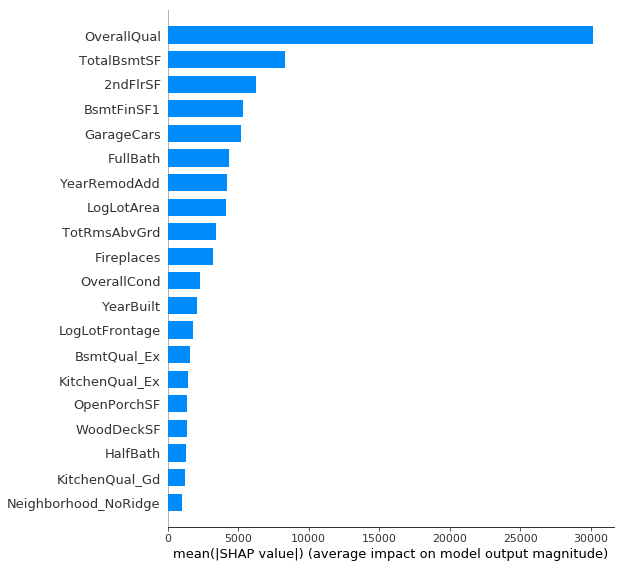

In [93]:
shap_tool.show_summary_plot()

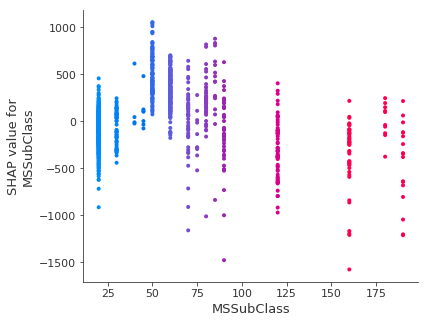

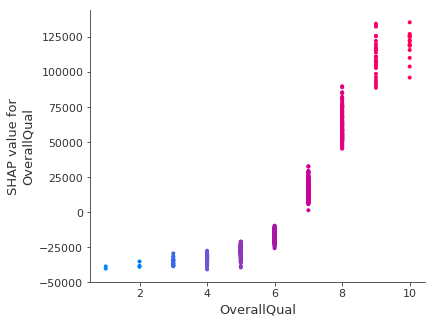

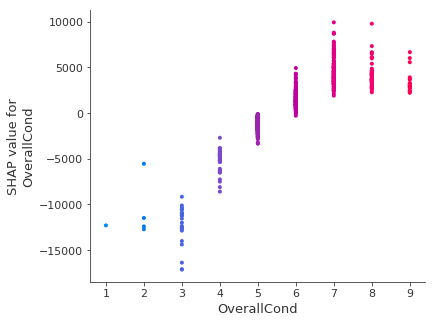

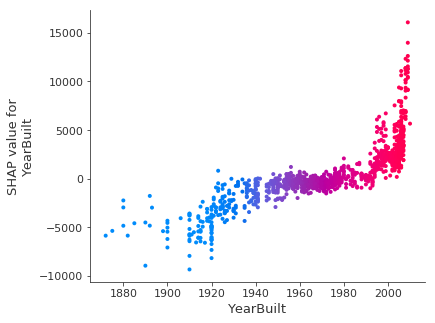

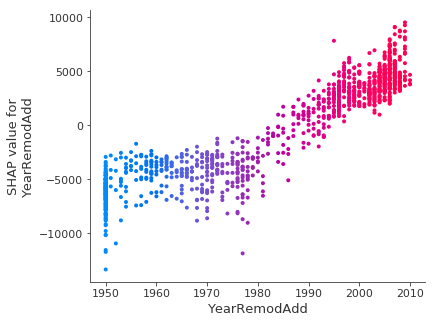

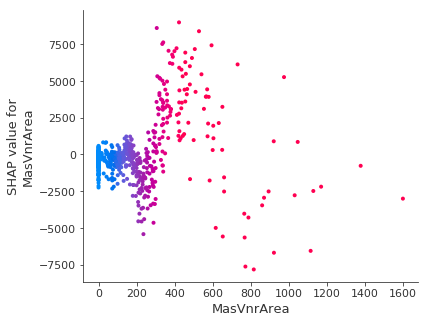

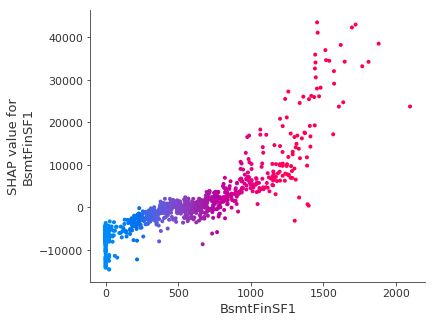

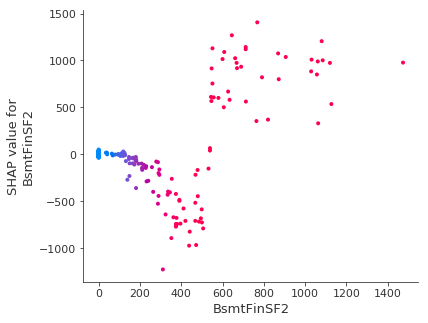

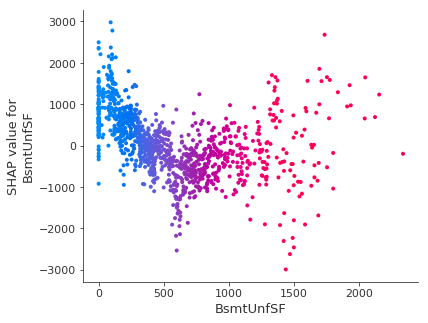

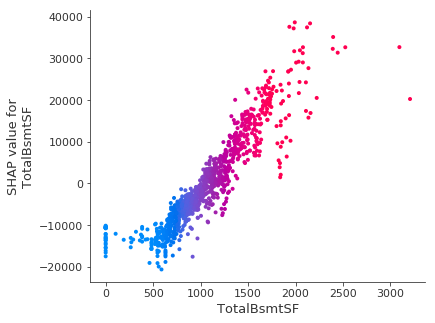

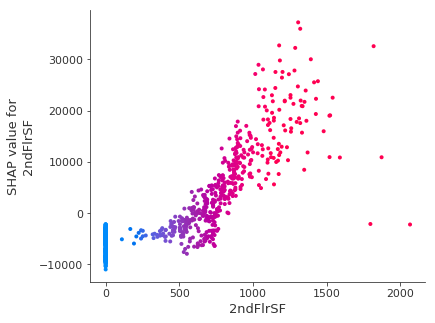

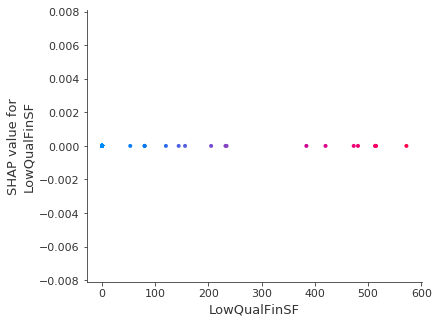

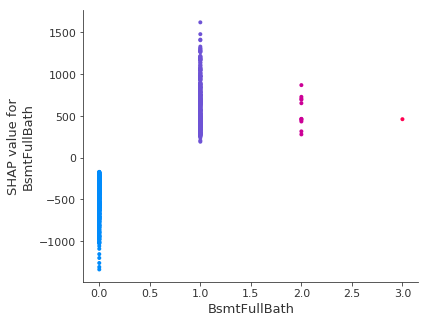

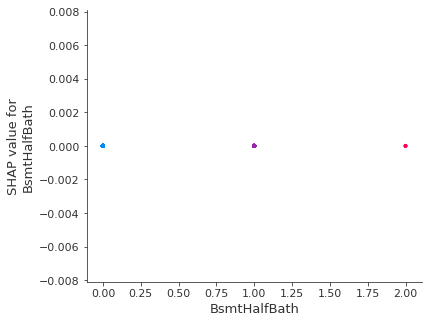

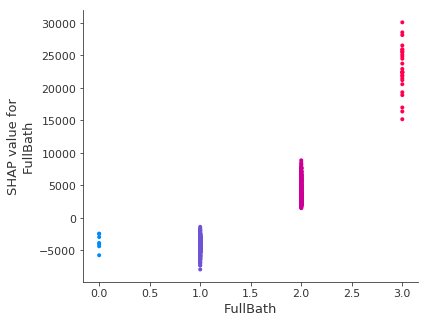

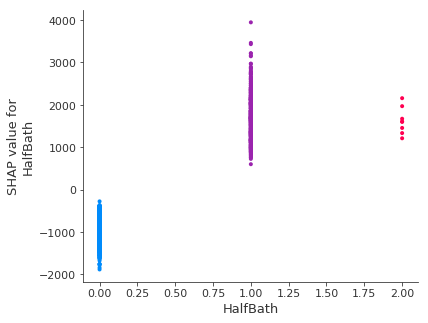

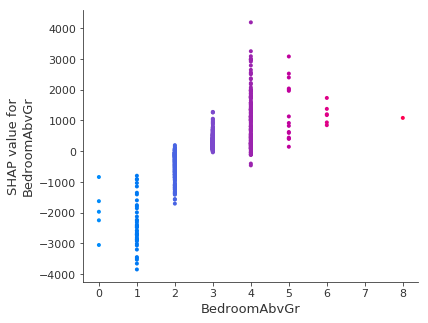

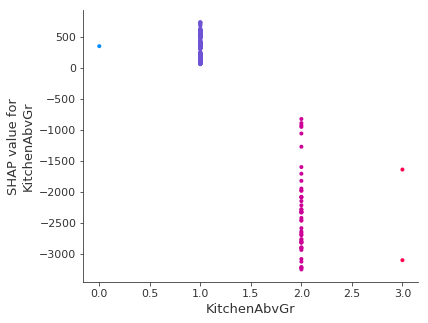

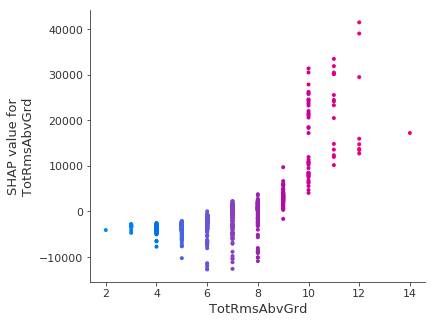

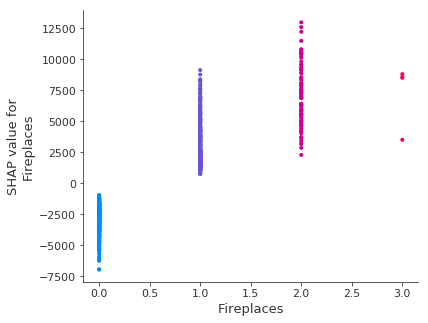

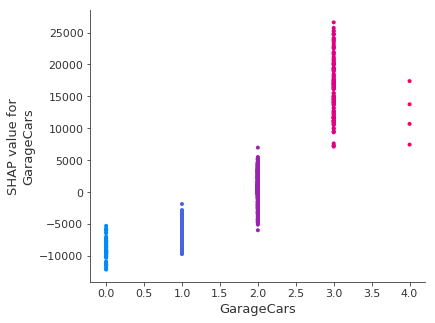

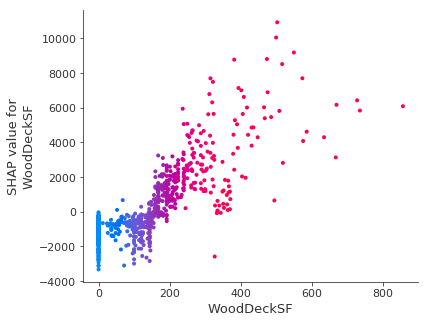

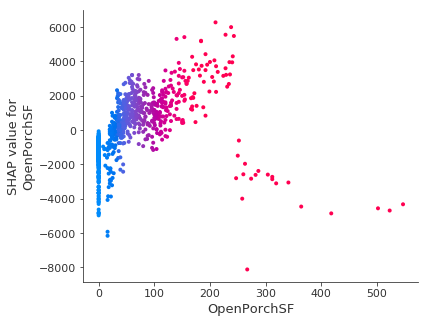

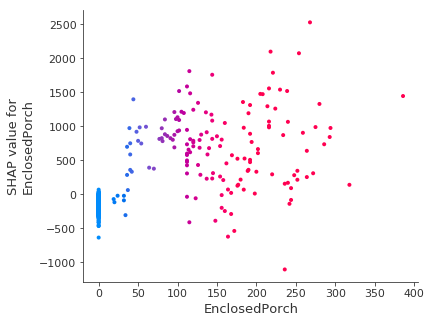

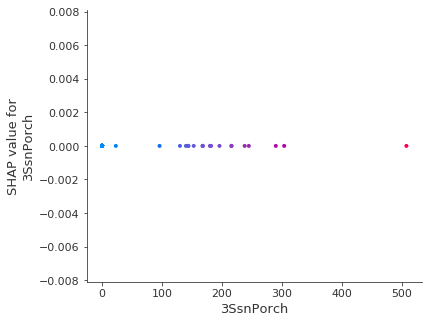

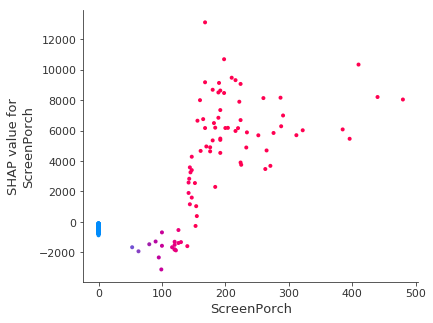

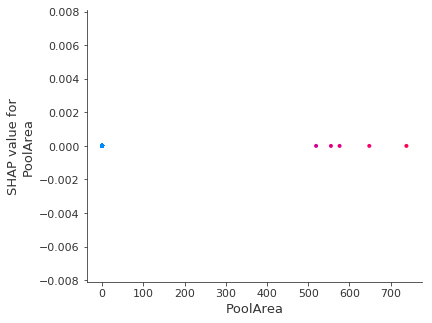

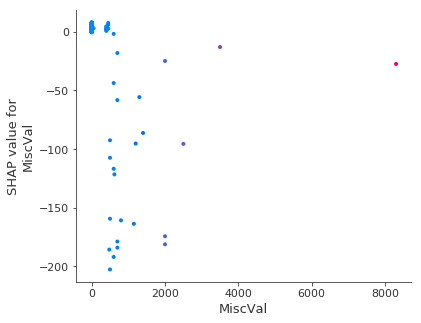

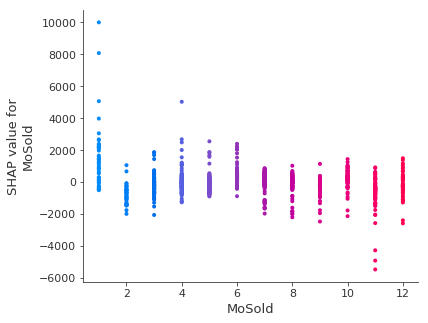

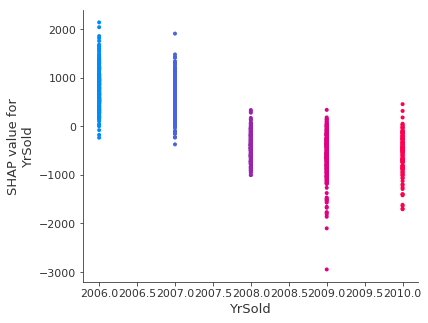

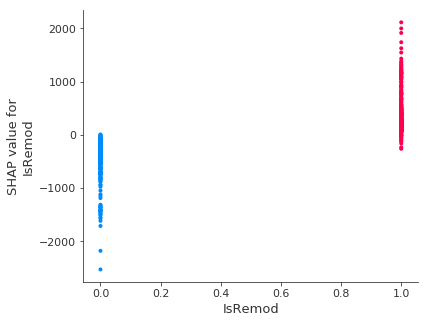

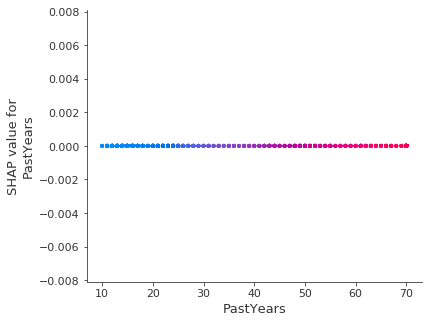

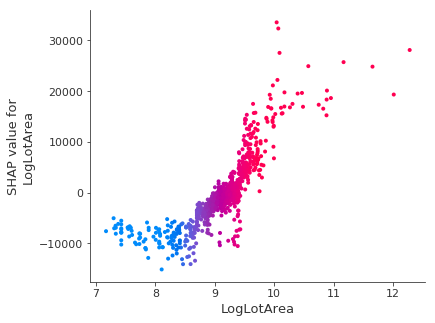

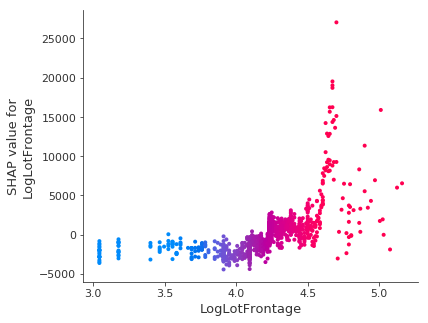

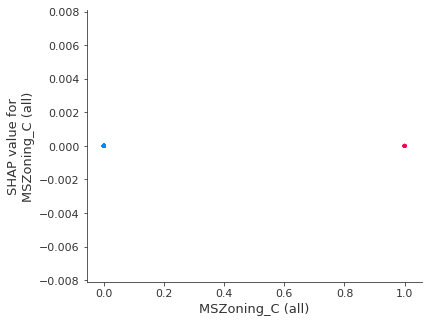

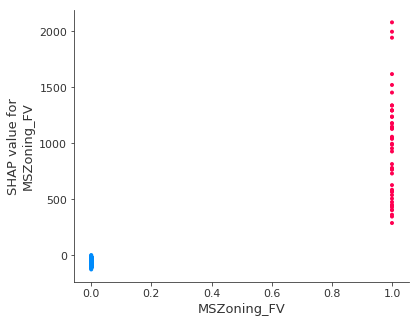

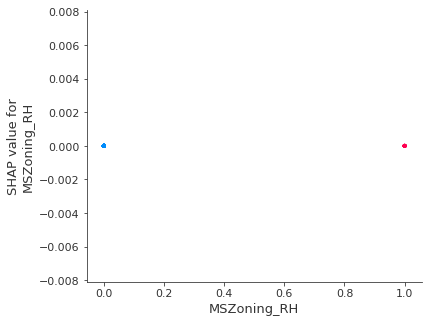

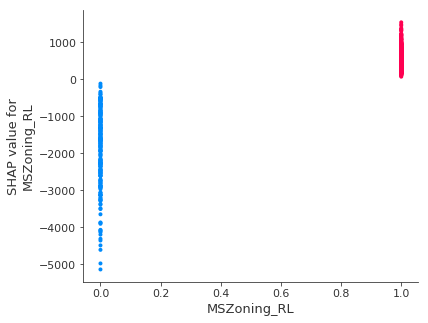

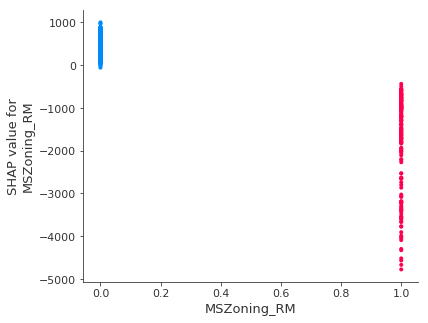

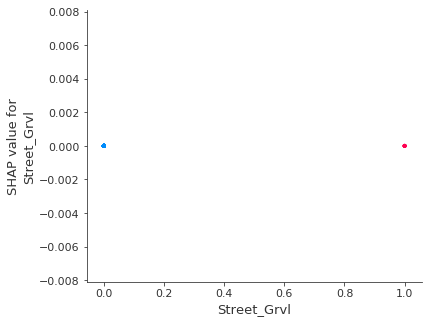

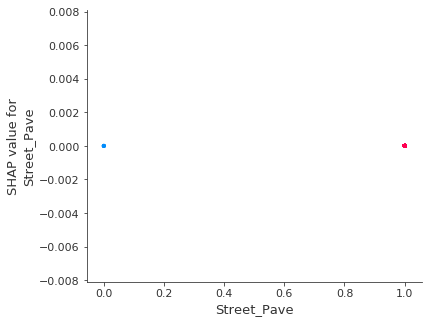

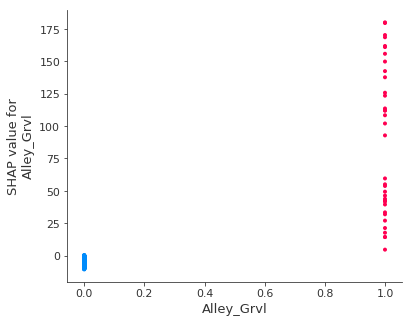

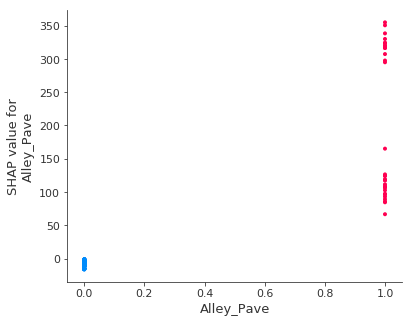

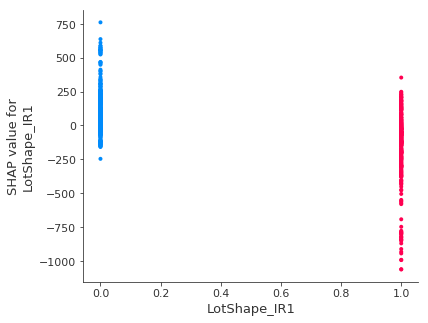

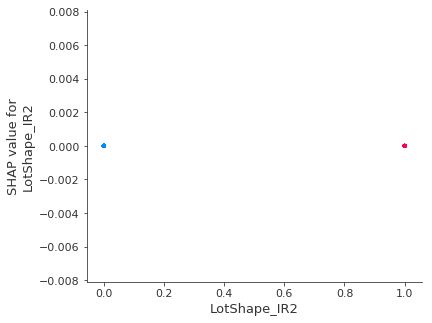

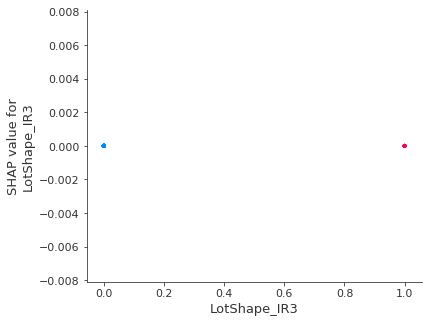

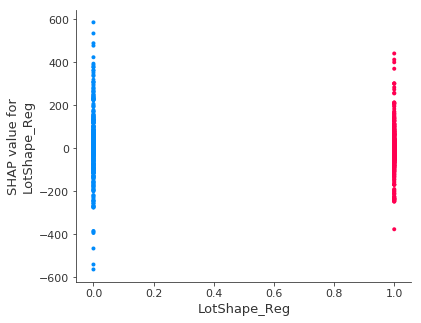

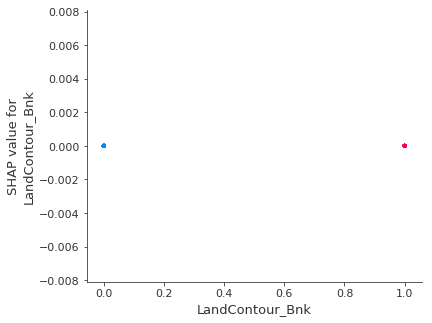

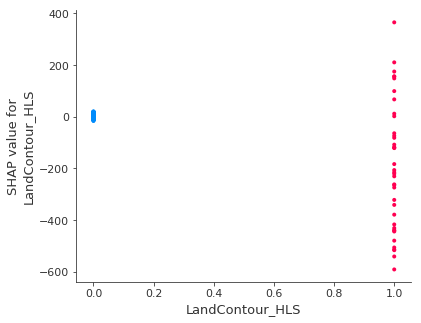

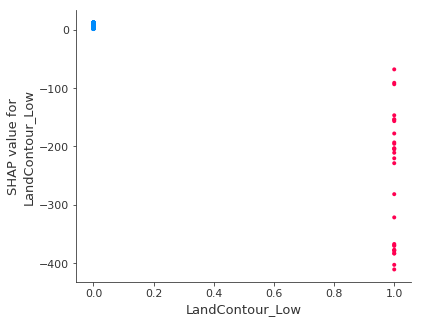

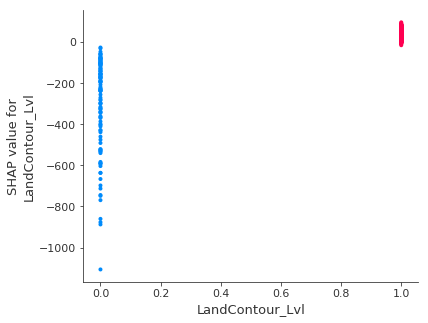

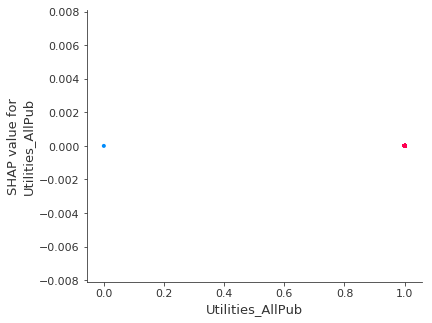

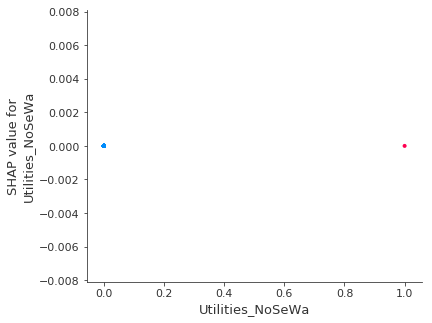

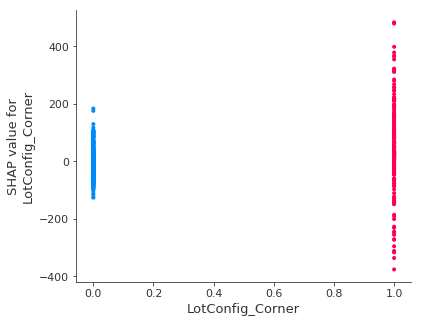

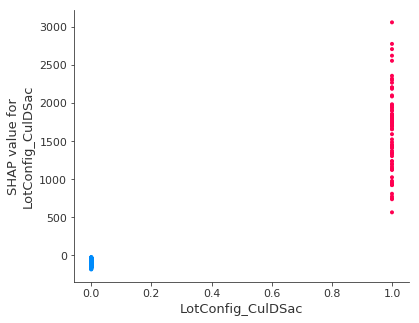

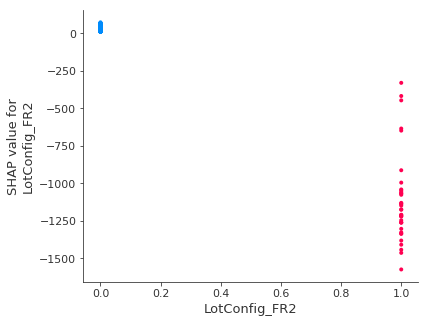

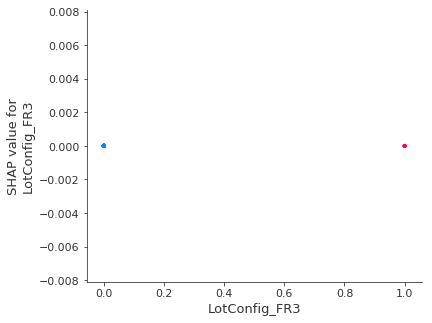

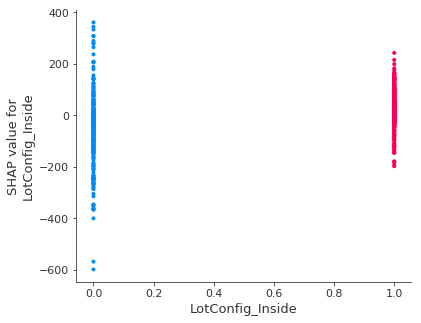

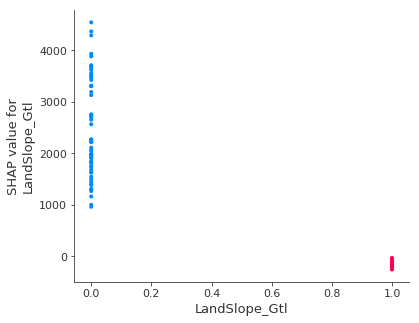

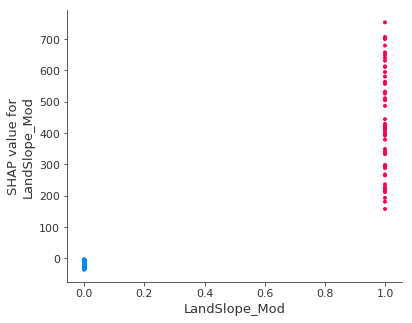

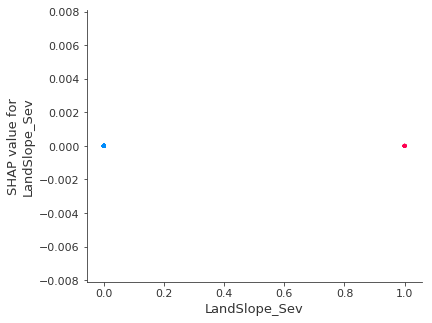

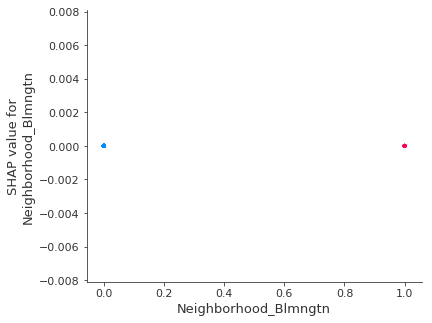

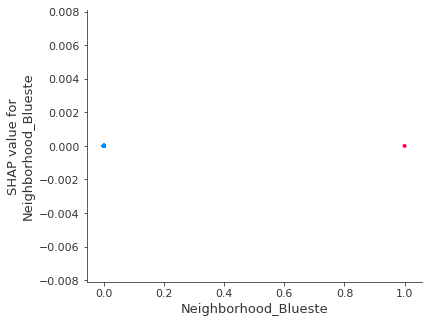

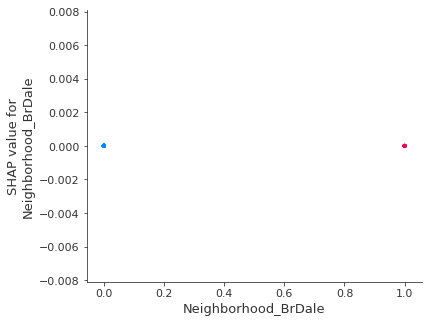

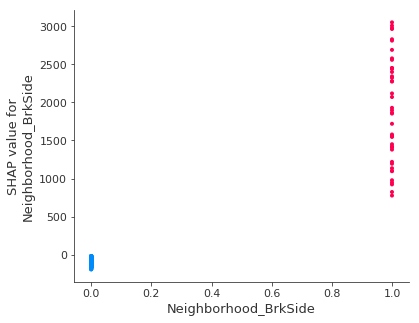

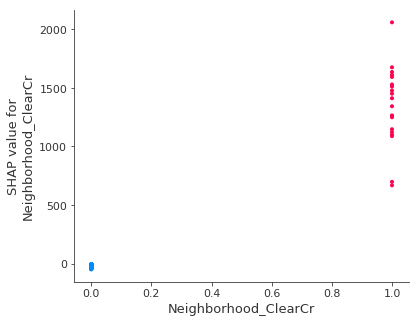

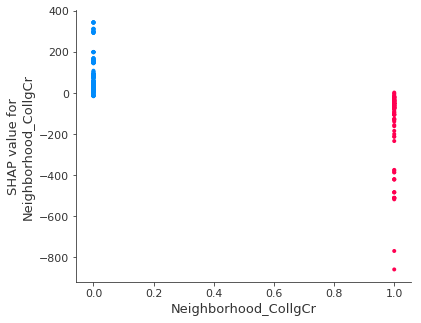

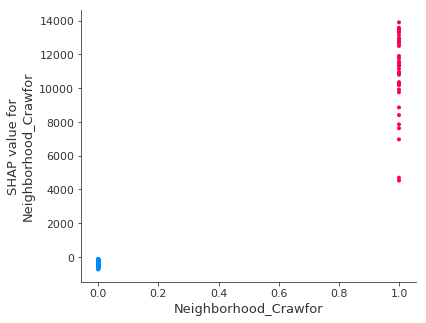

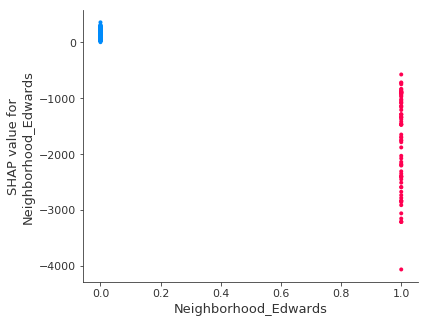

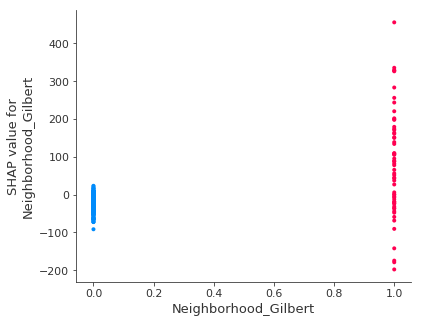

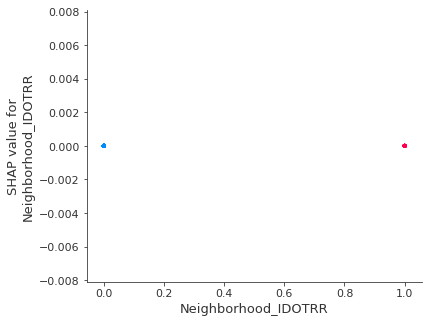

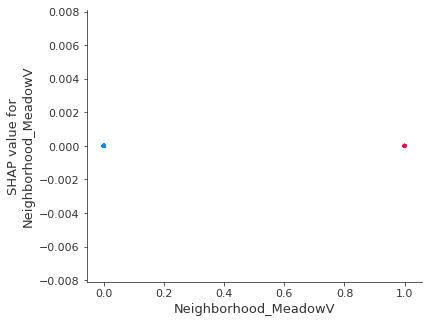

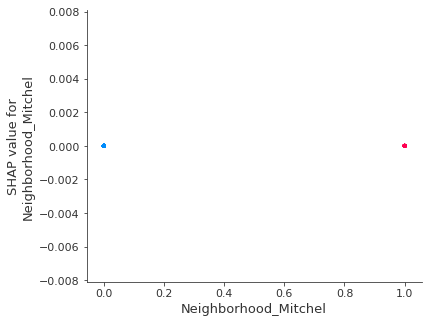

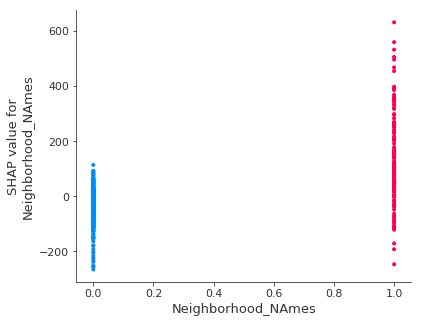

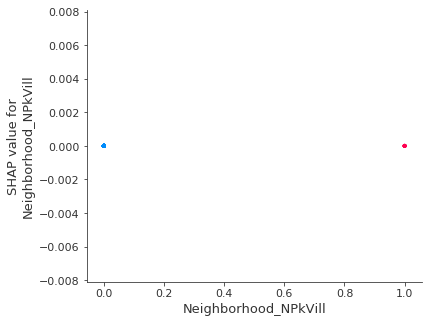

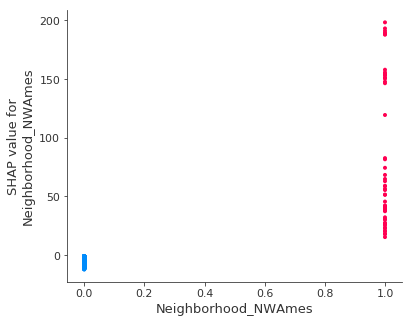

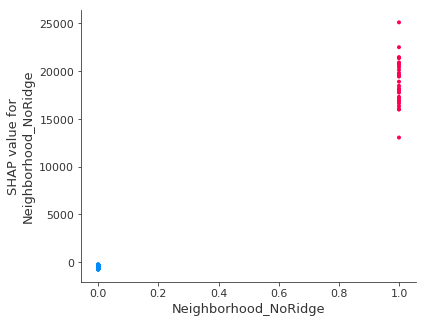

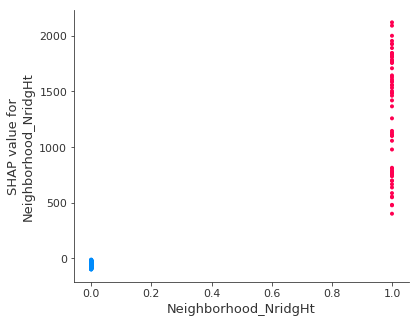

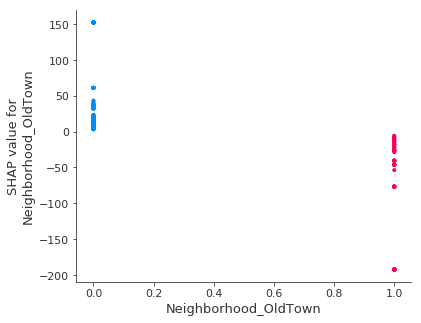

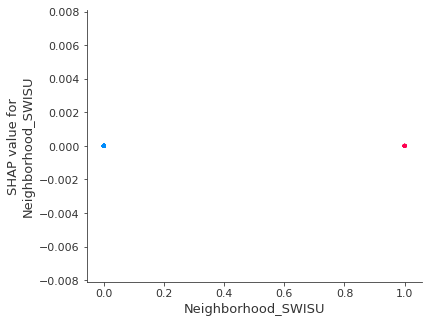

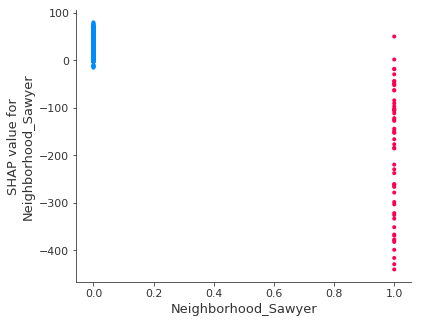

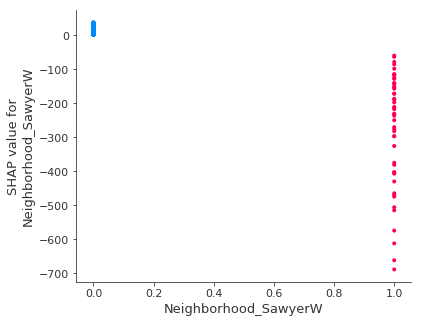

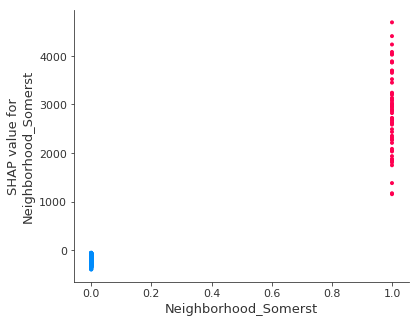

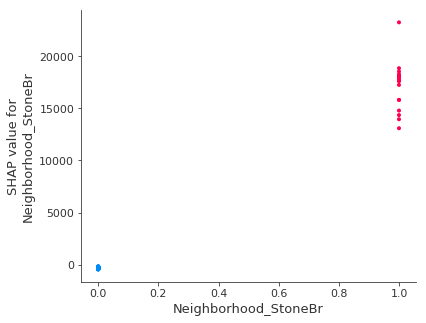

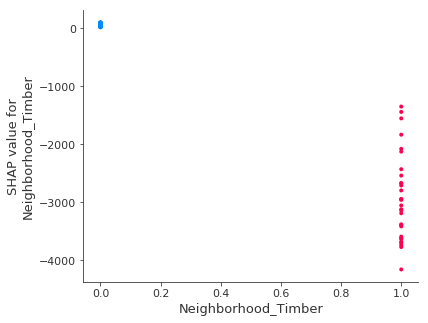

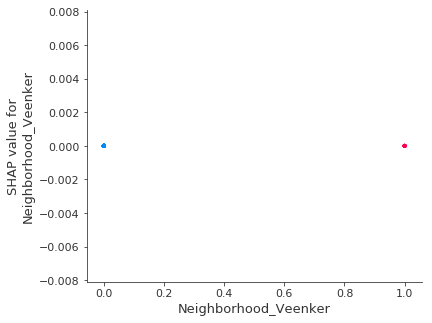

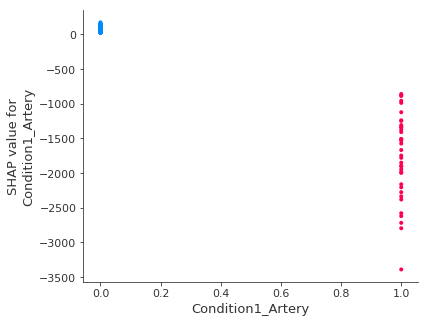

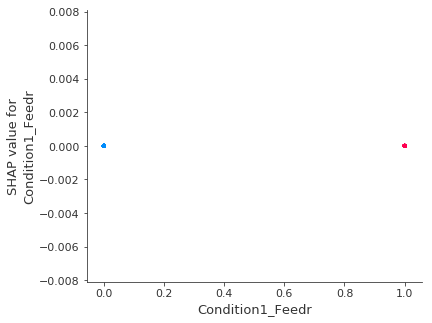

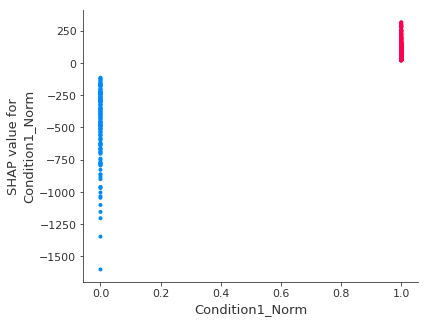

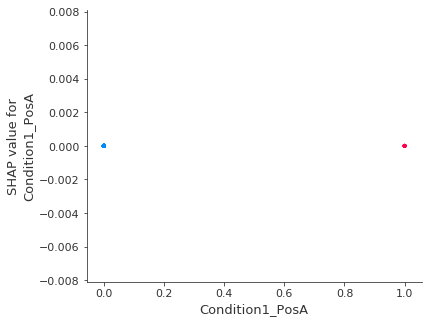

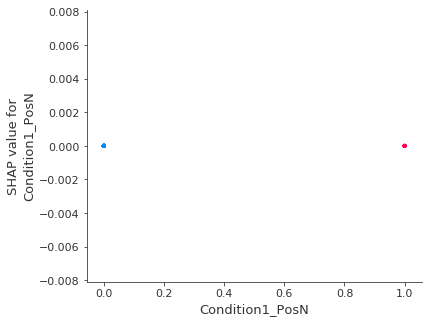

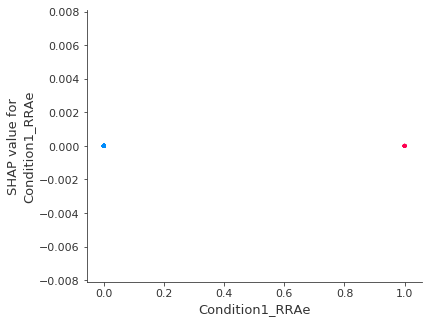

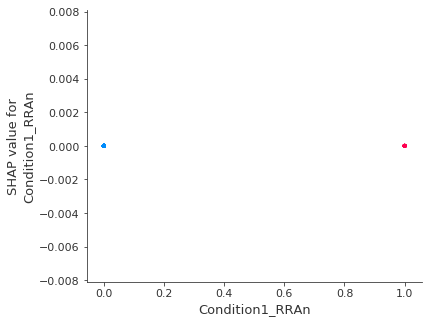

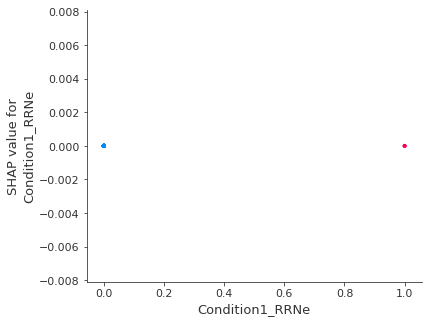

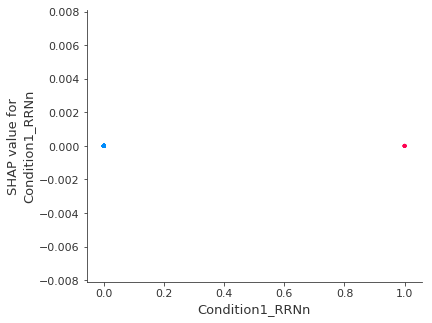

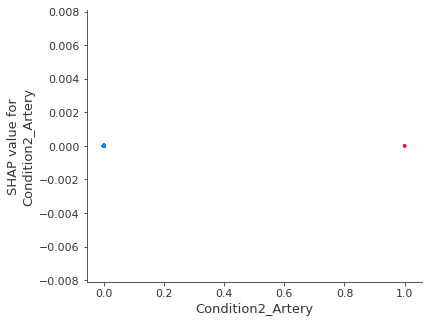

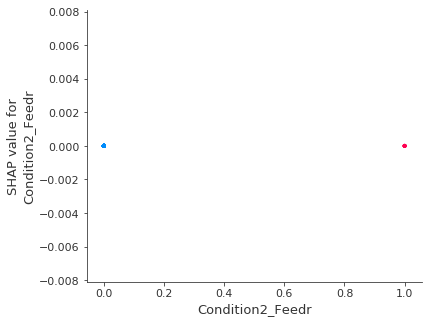

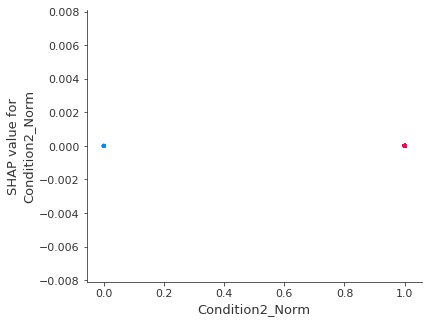

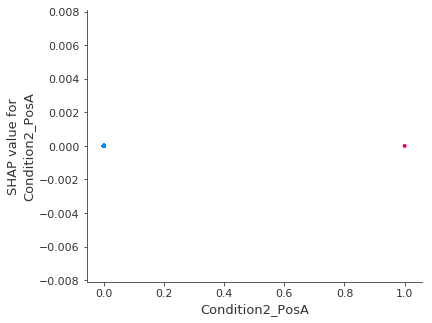

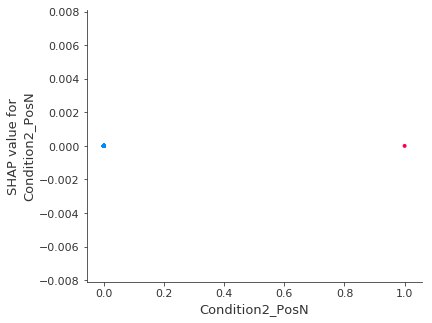

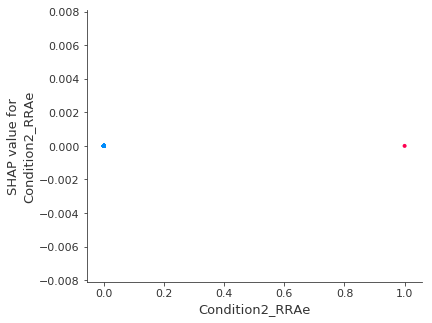

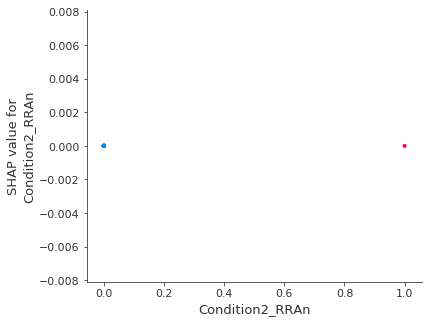

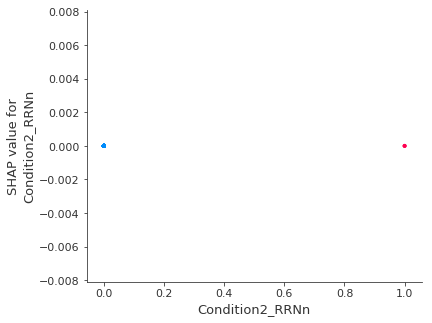

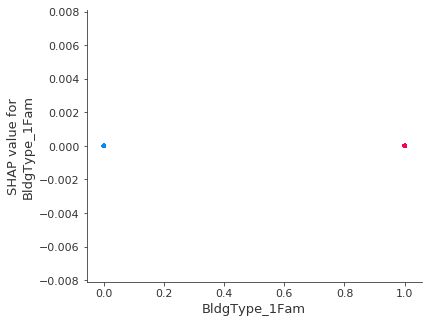

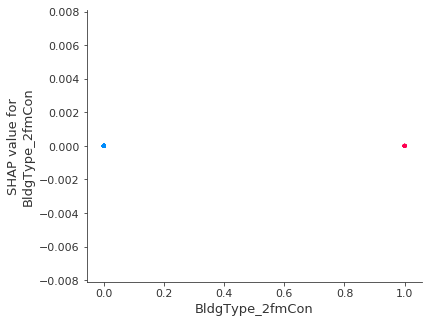

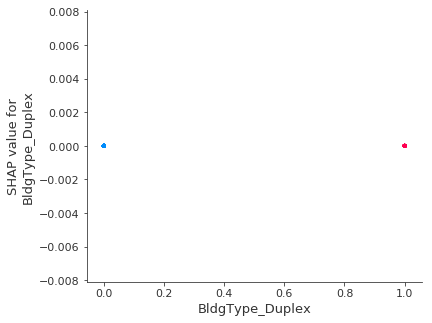

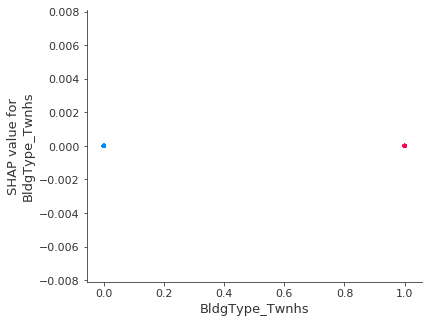

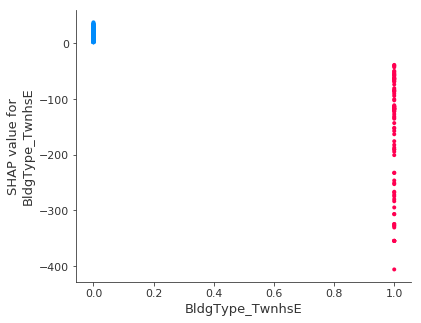

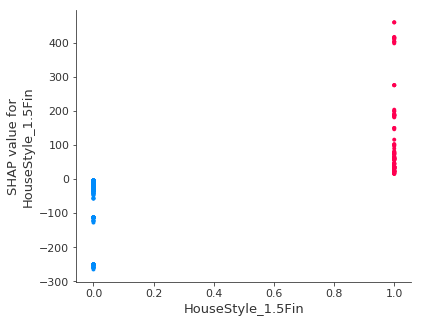

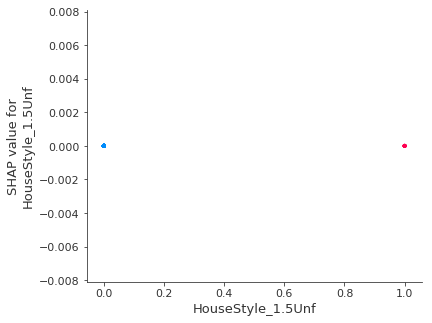

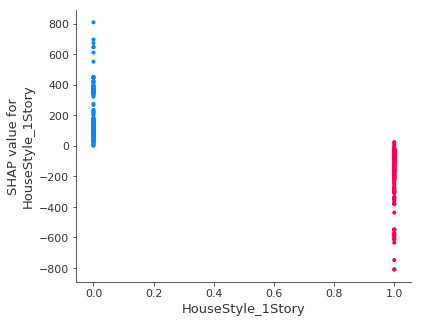

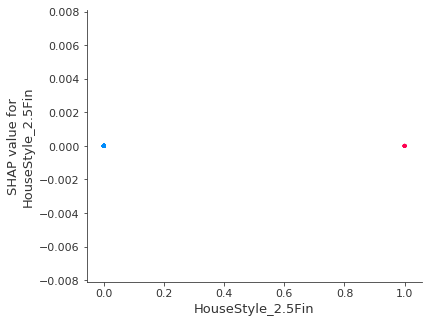

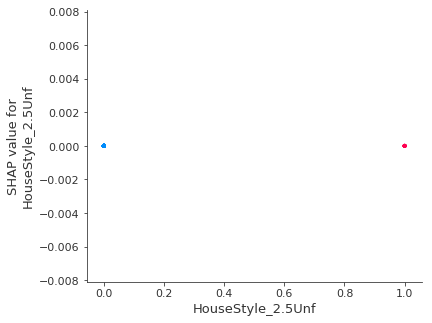

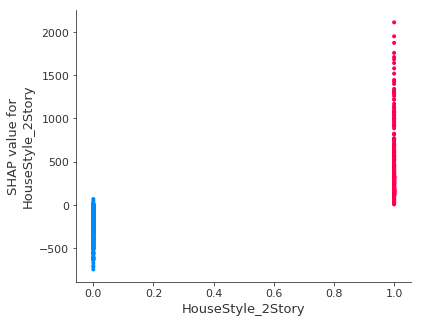

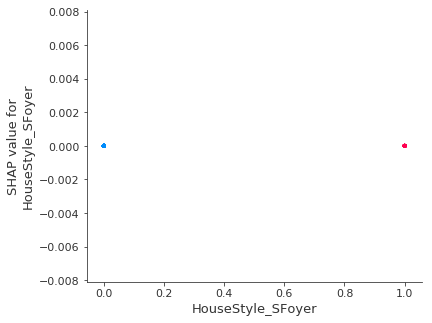

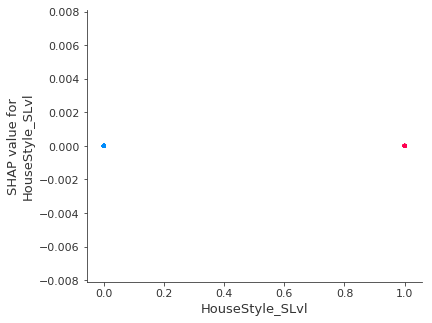

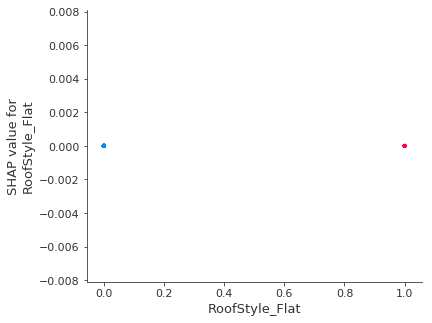

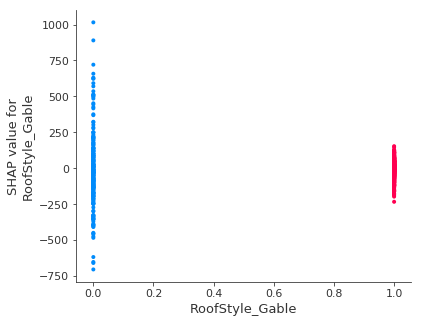

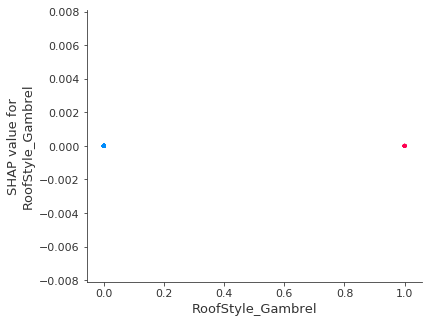

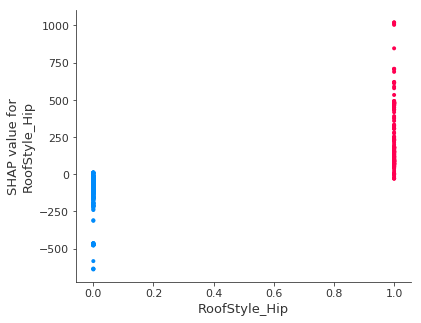

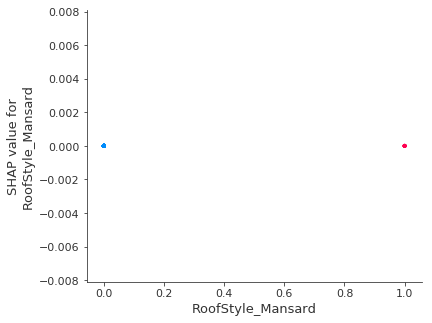

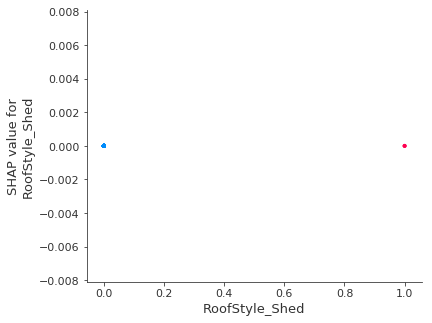

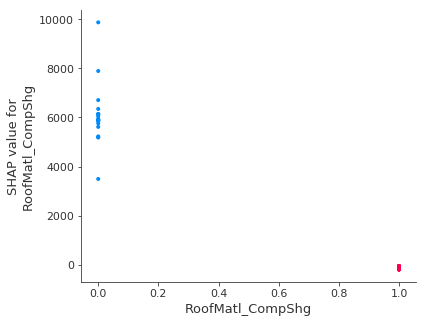

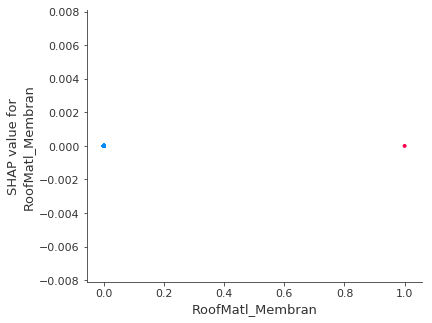

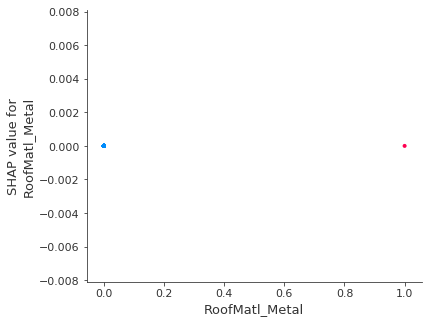

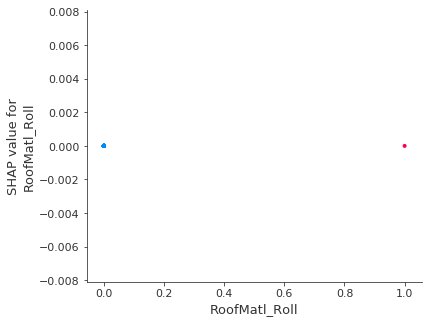

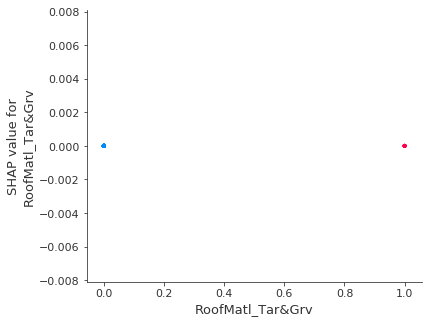

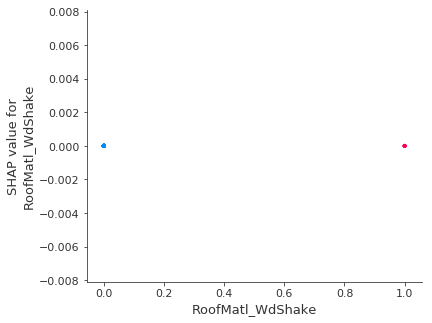

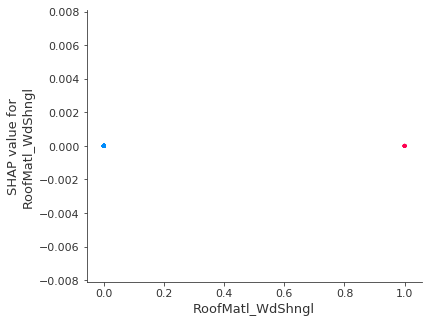

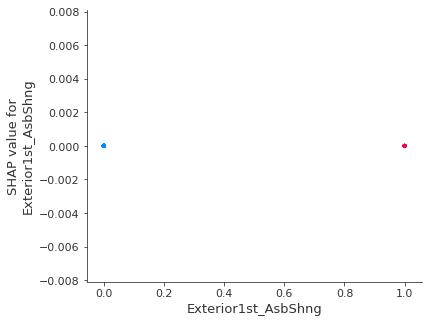

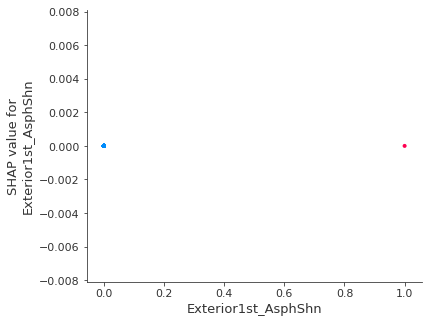

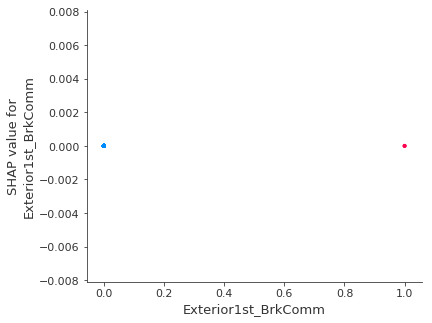

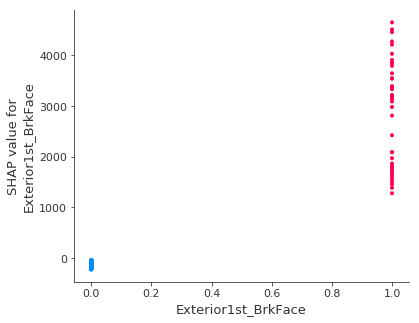

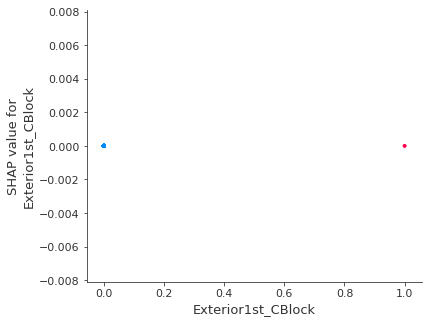

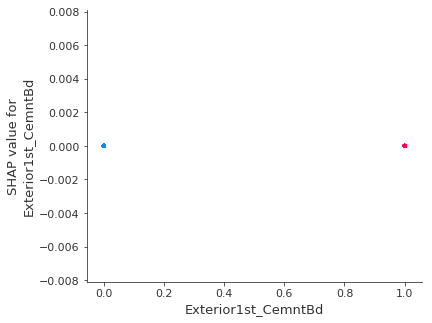

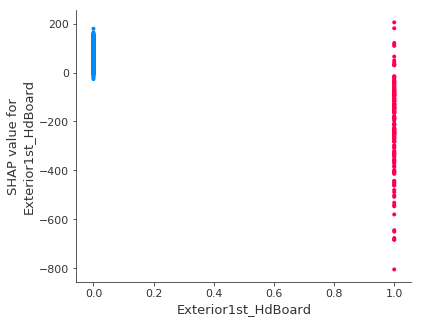

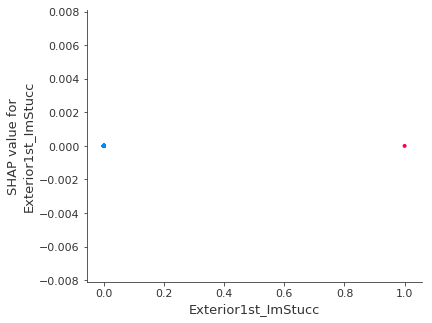

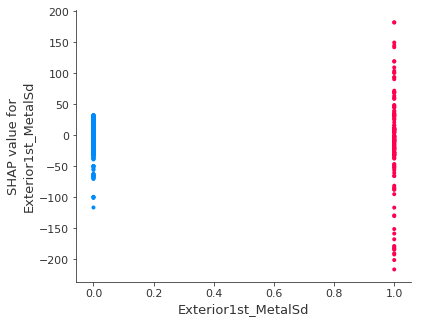

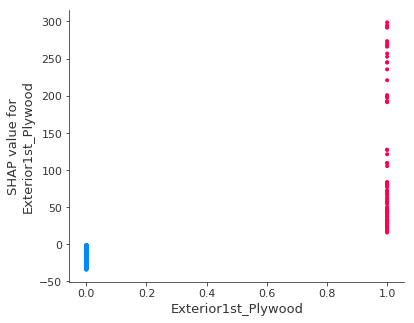

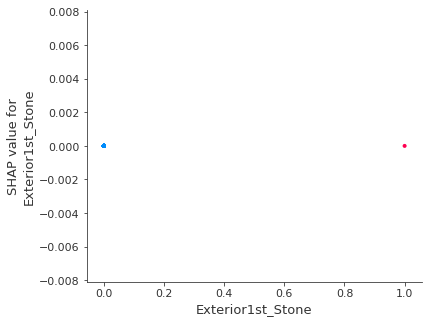

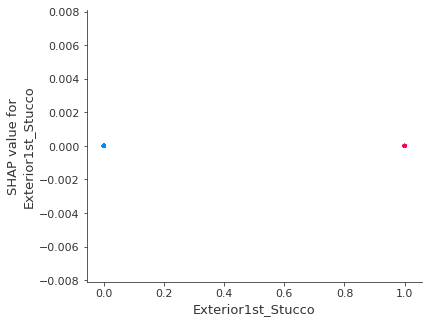

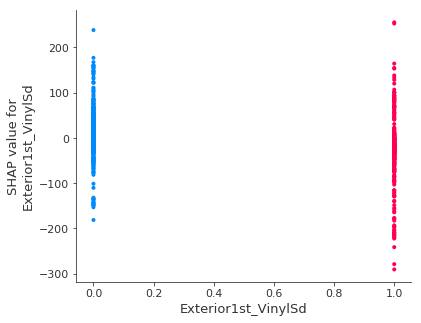

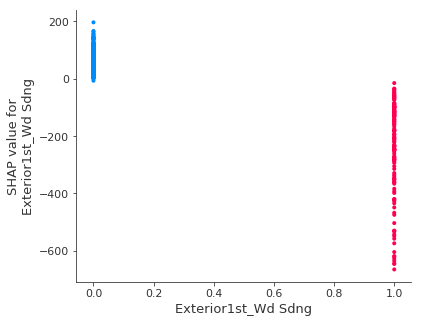

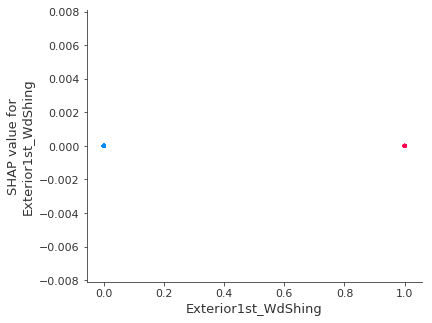

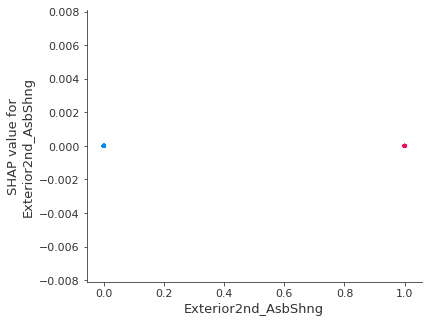

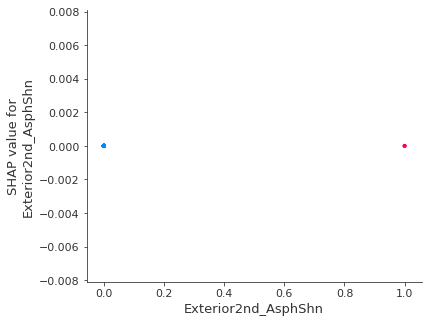

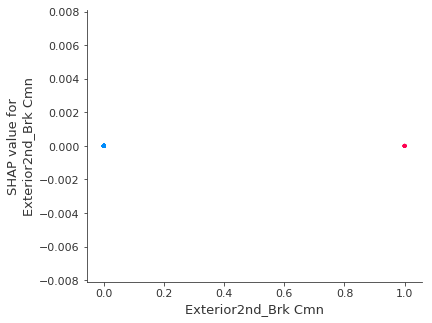

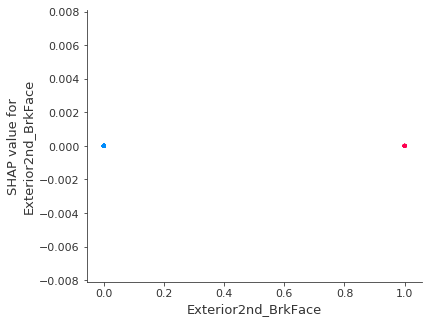

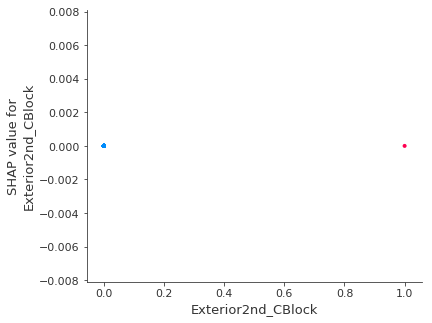

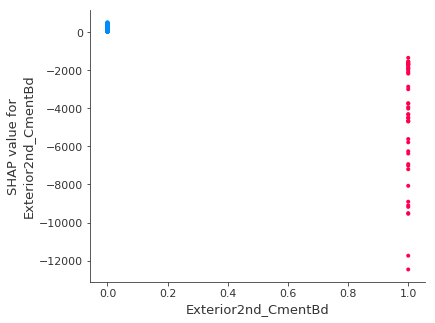

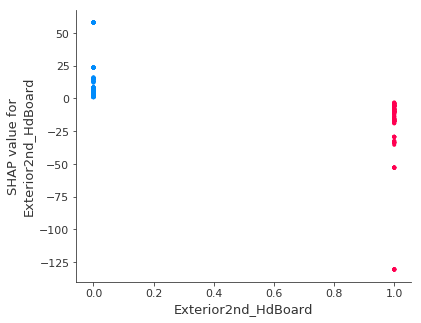

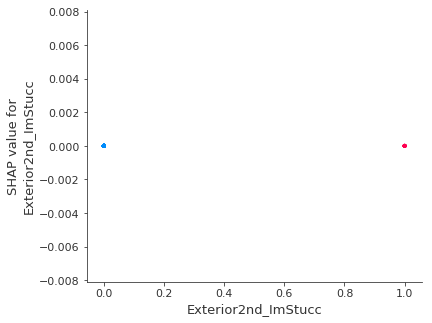

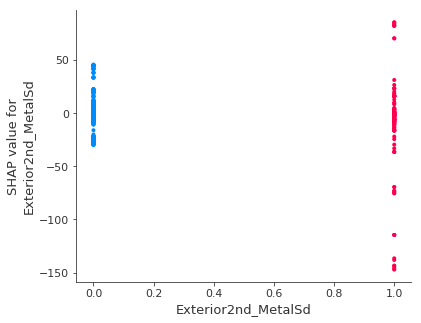

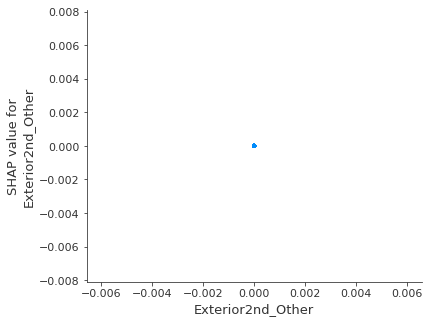

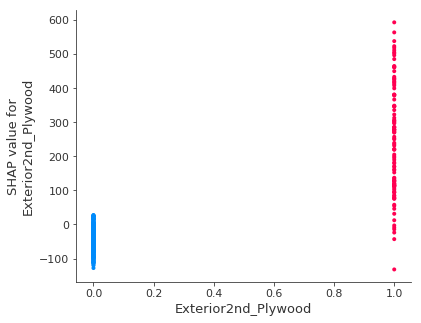

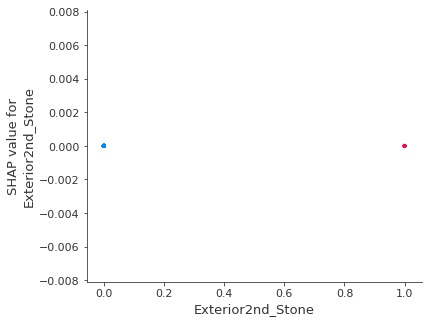

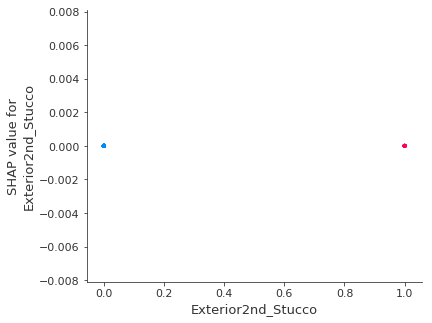

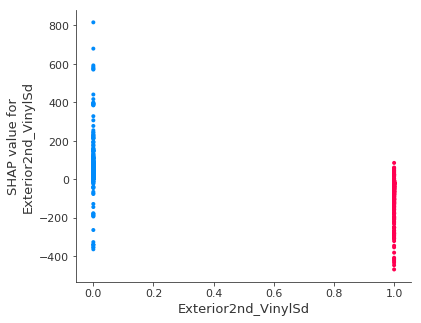

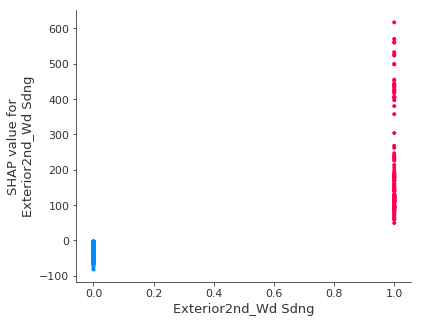

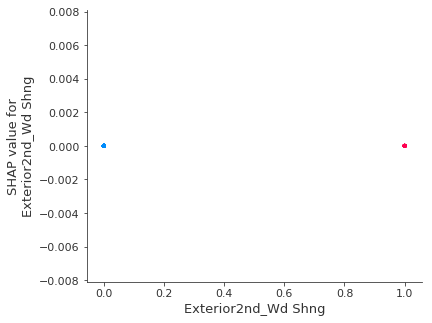

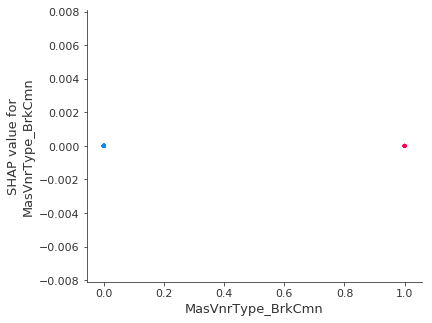

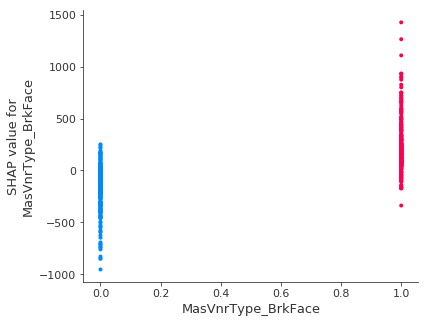

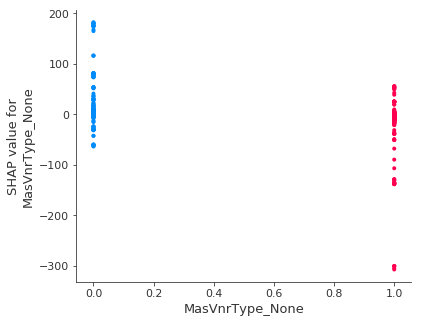

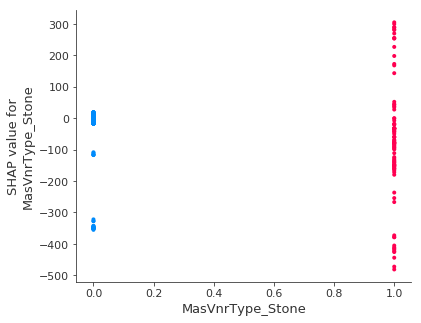

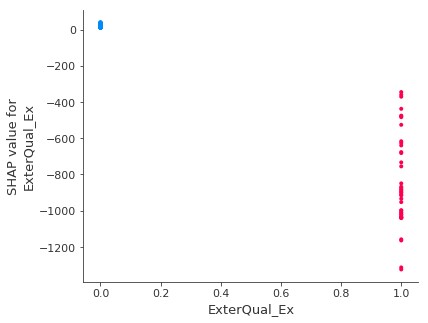

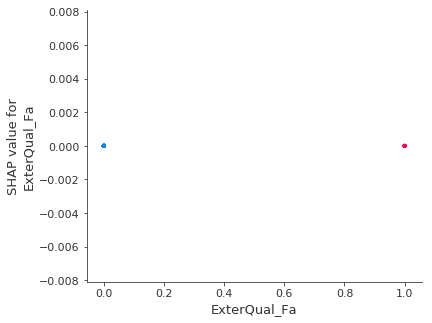

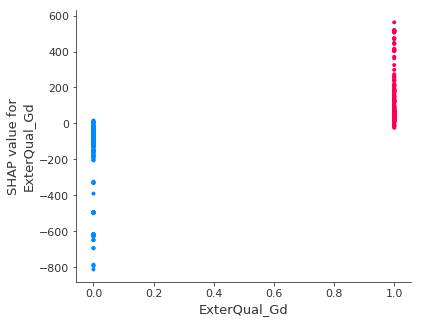

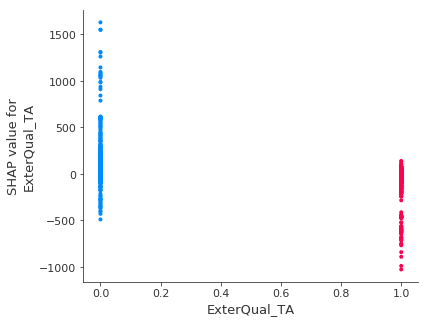

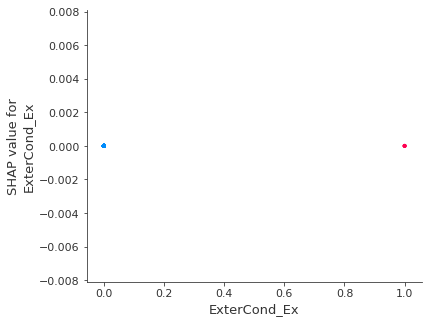

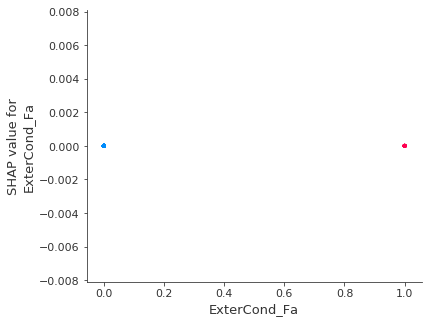

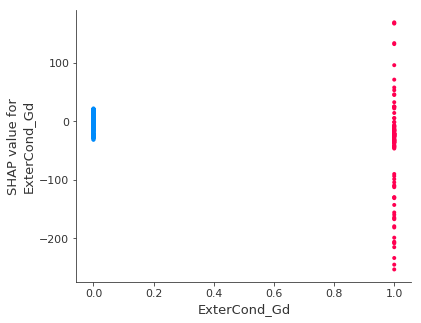

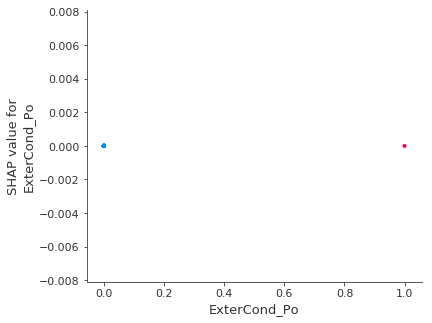

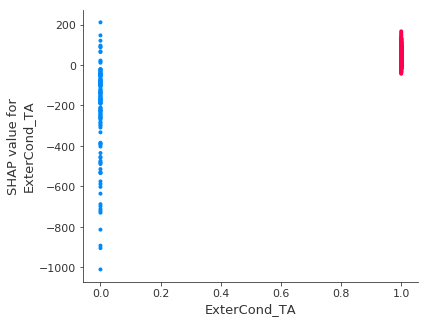

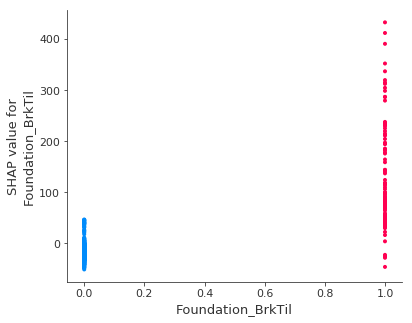

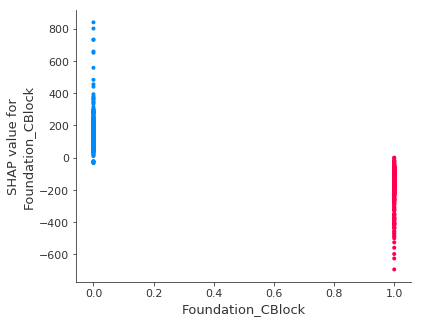

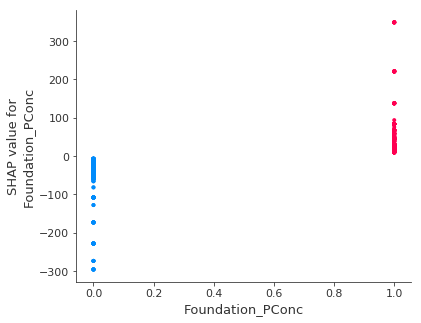

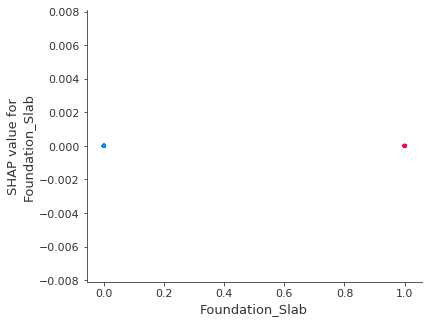

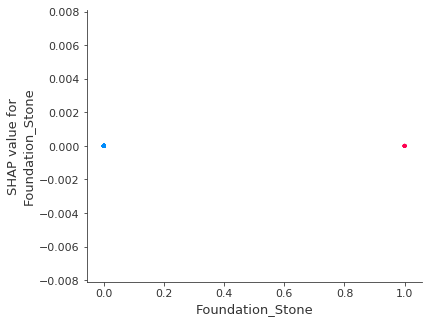

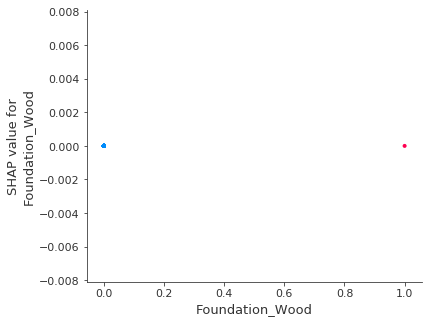

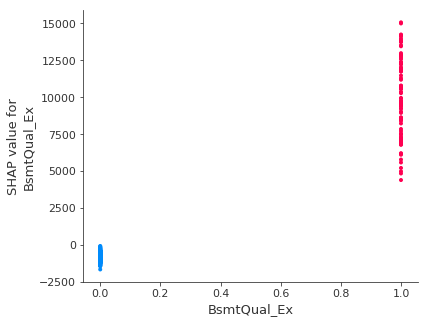

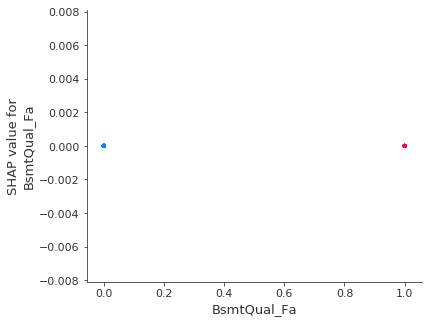

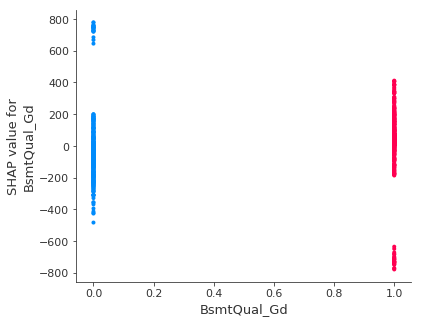

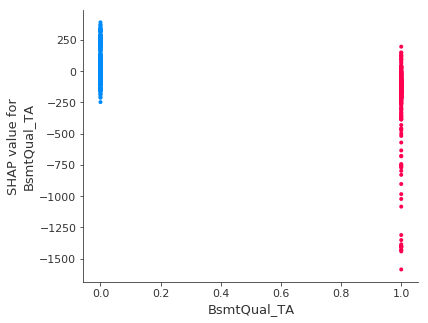

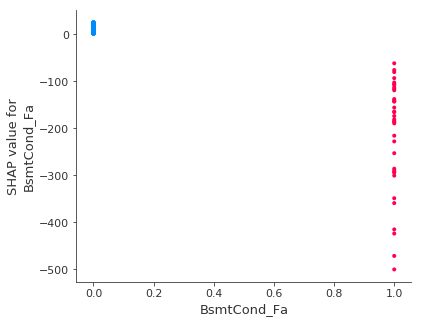

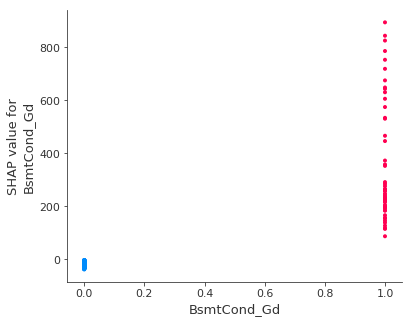

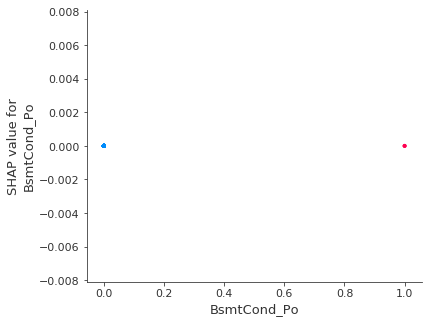

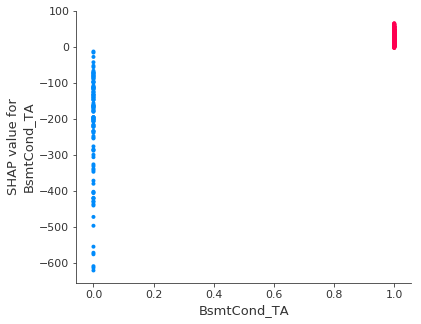

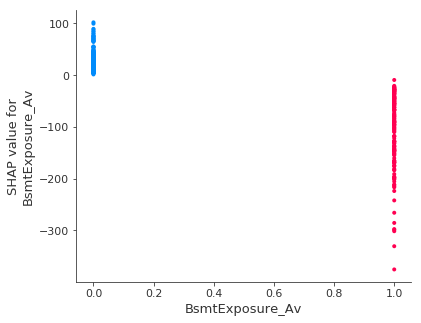

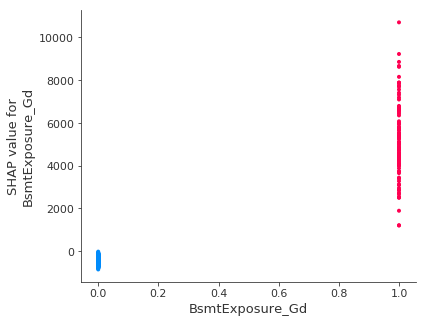

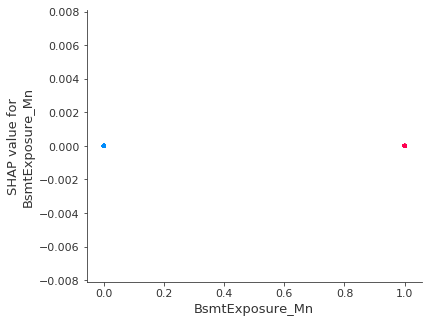

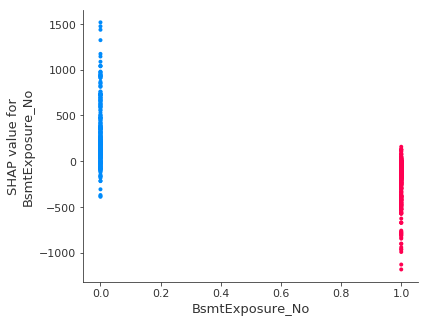

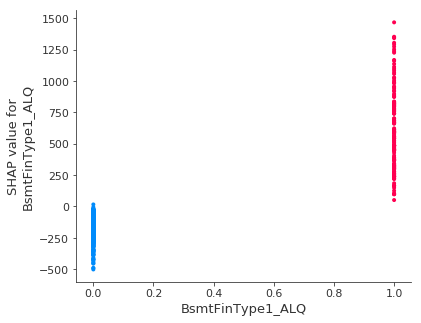

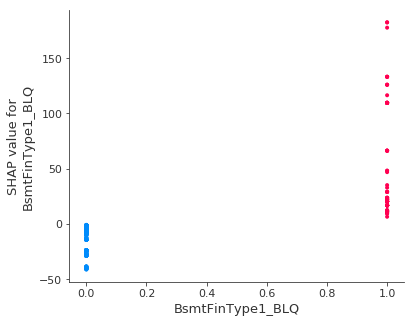

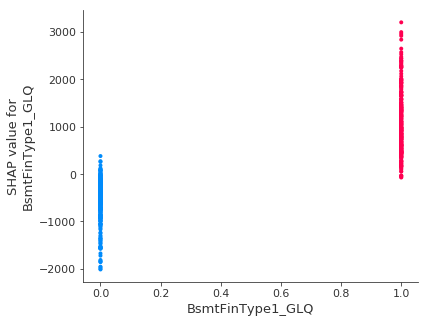

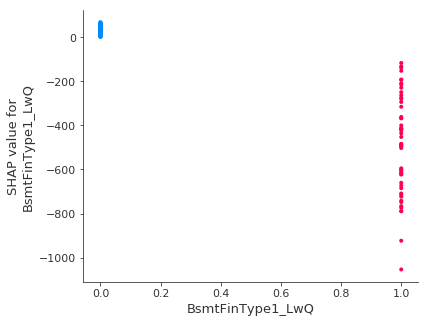

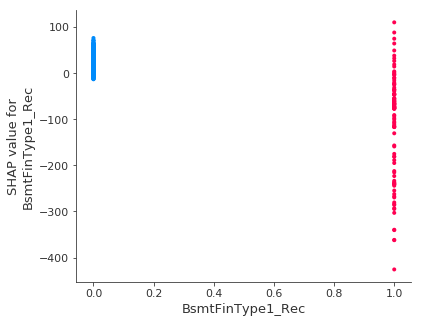

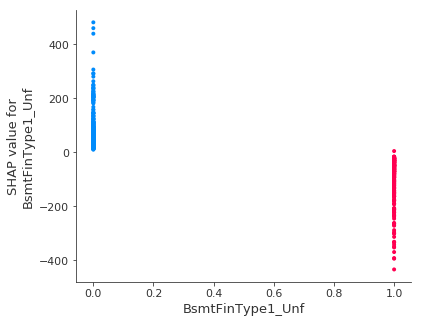

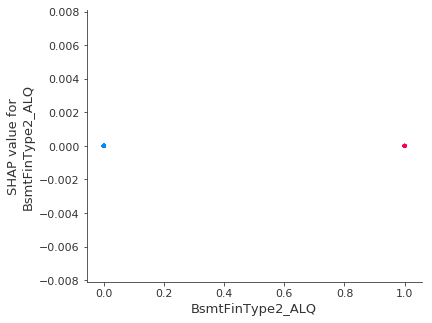

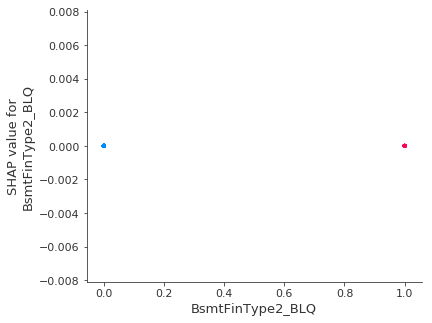

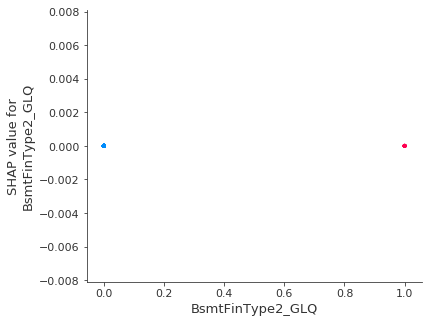

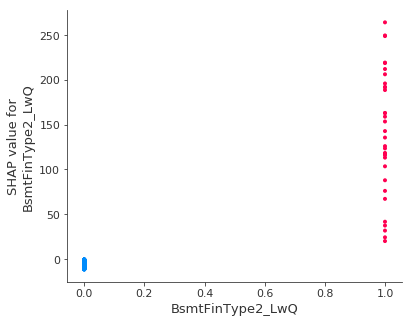

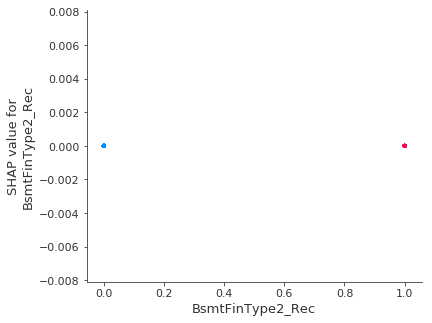

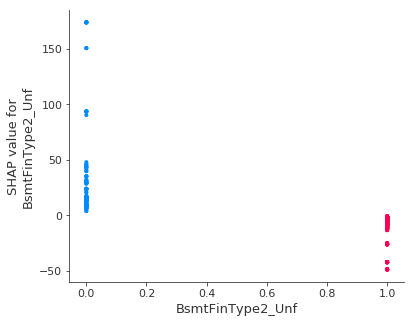

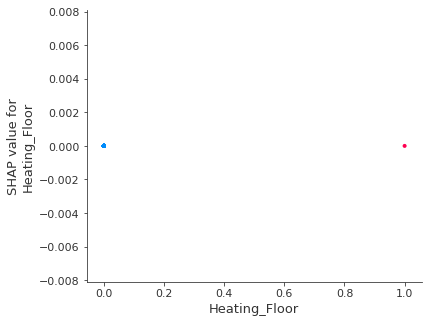

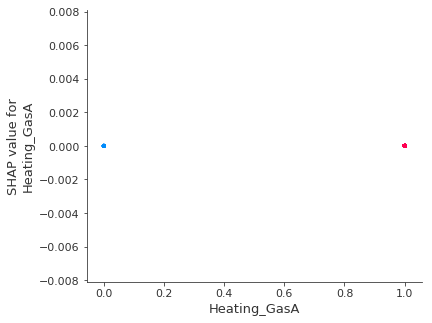

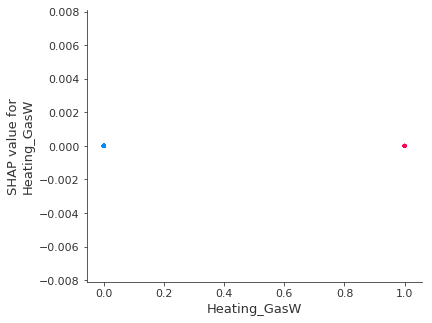

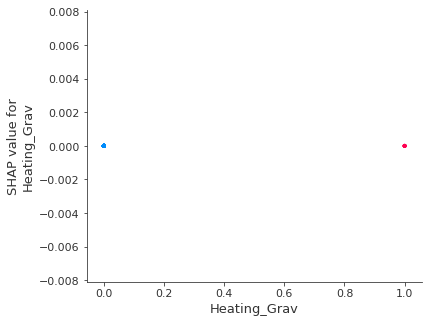

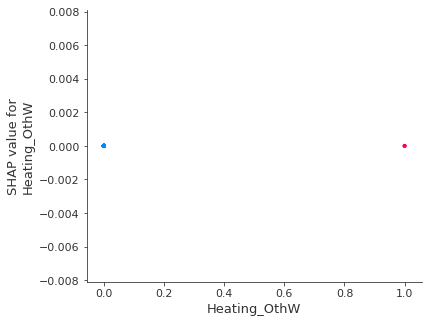

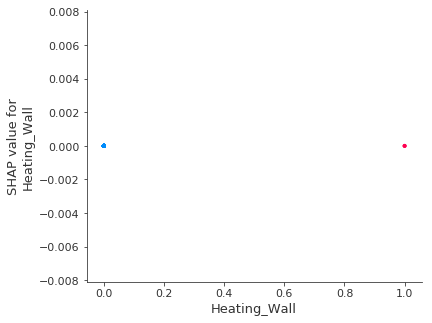

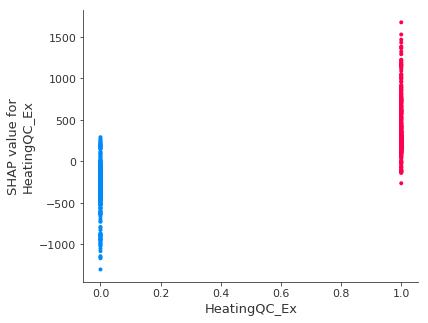

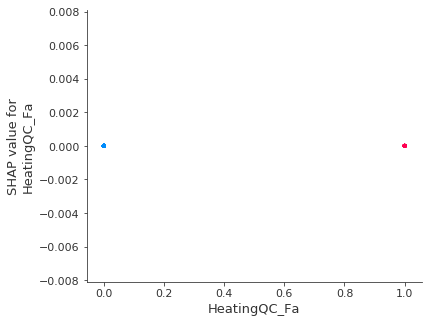

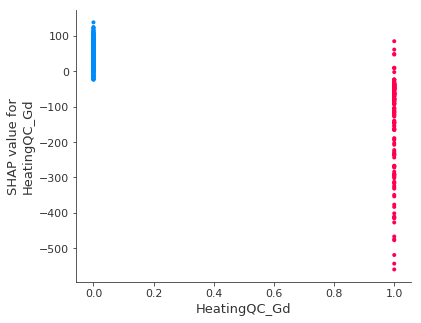

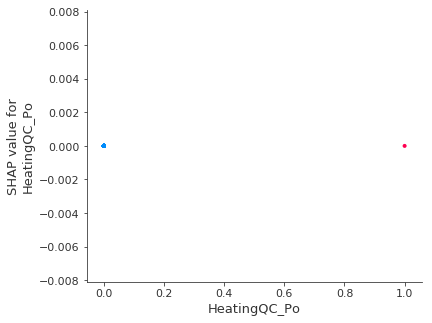

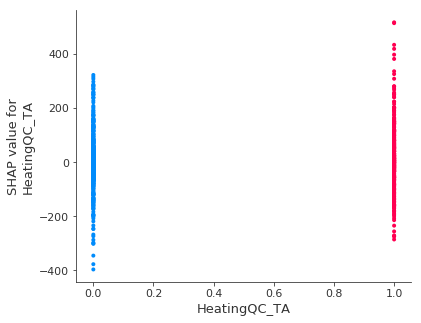

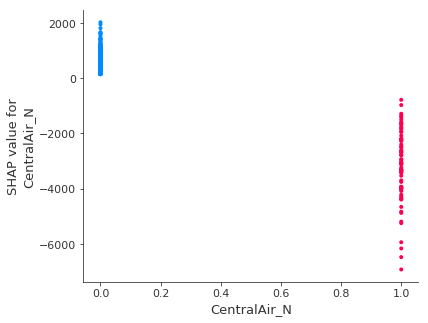

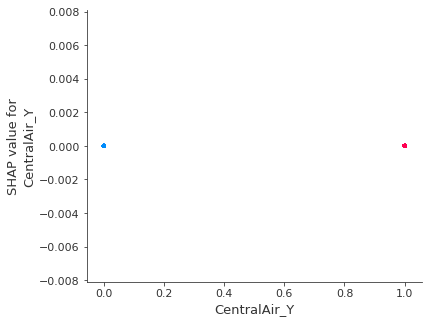

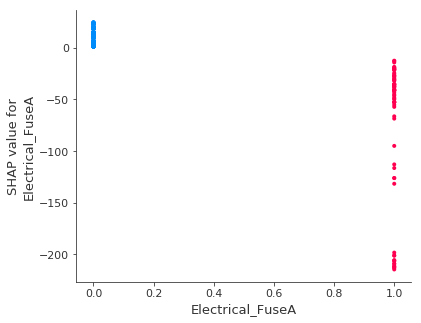

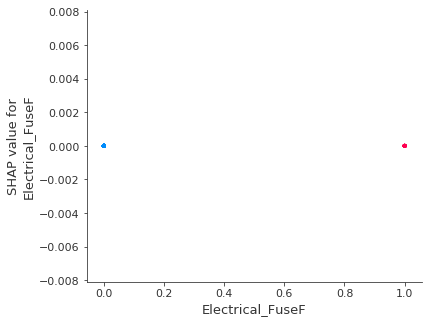

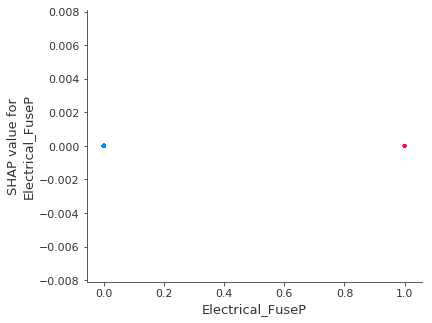

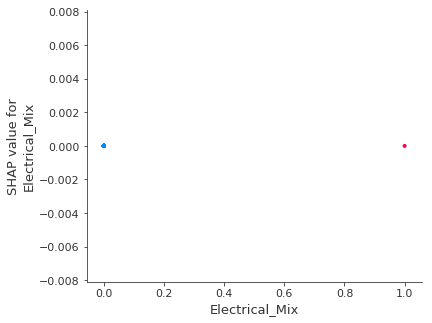

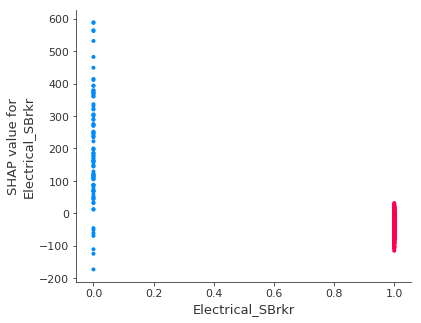

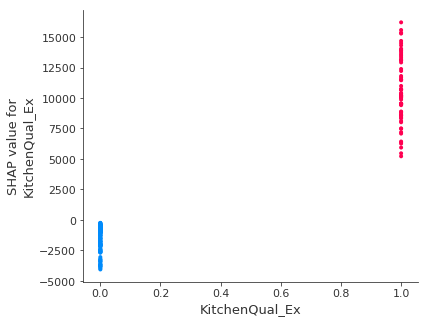

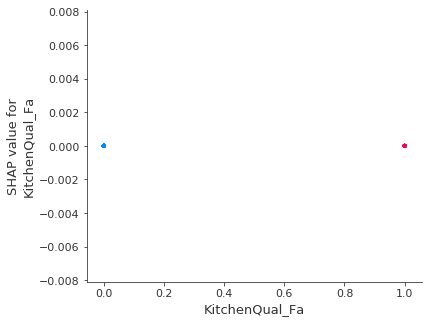

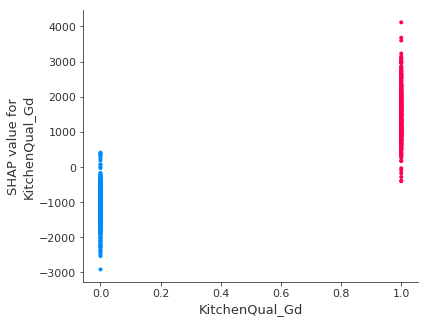

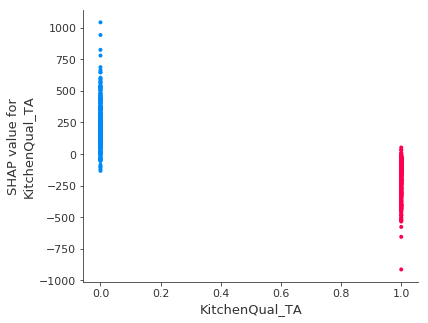

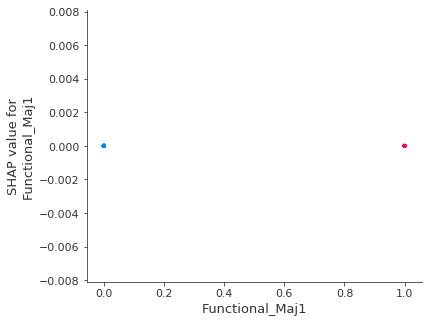

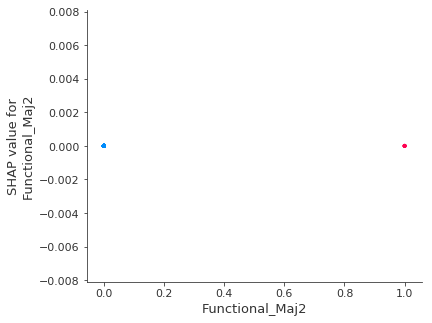

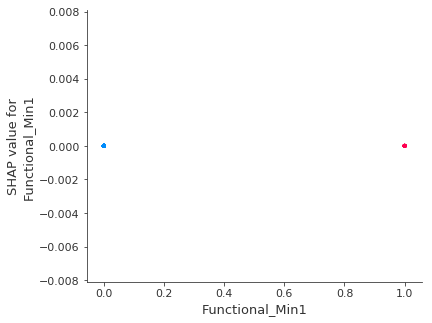

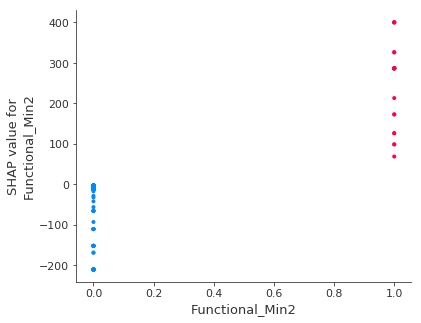

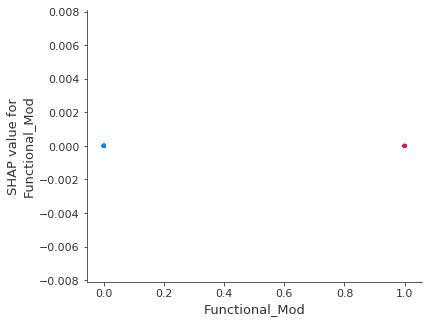

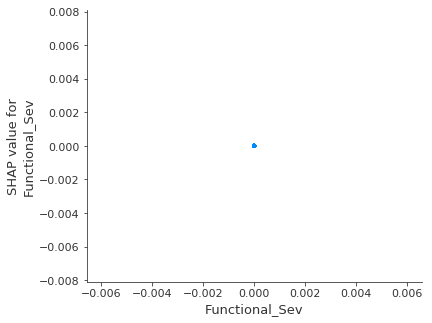

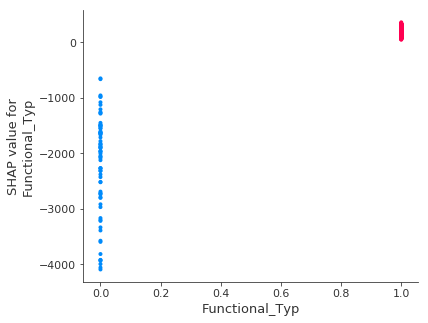

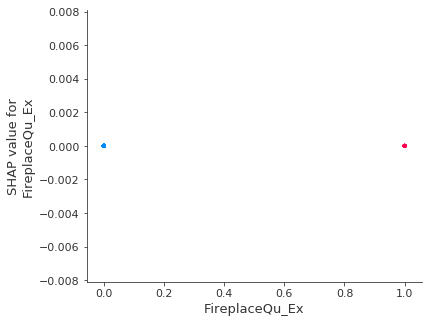

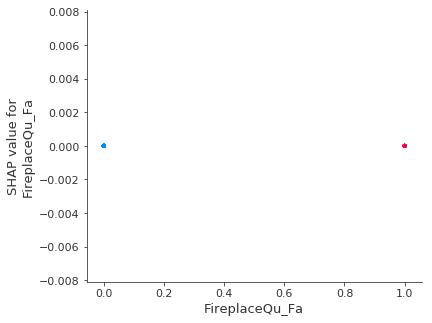

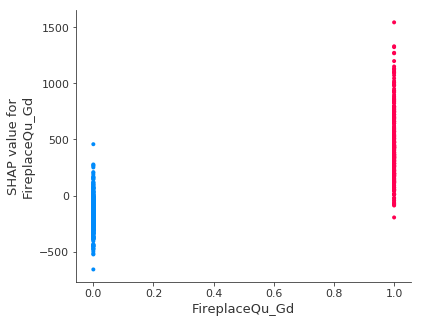

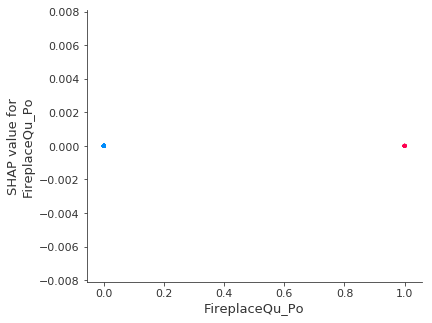

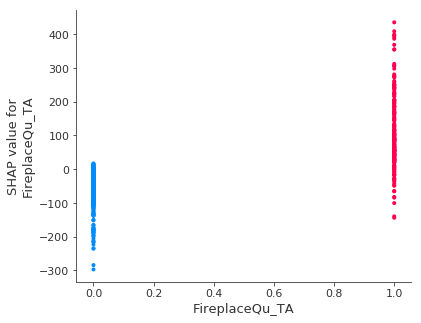

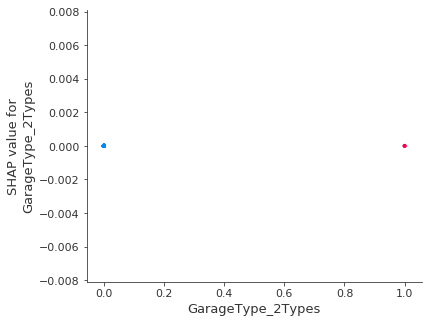

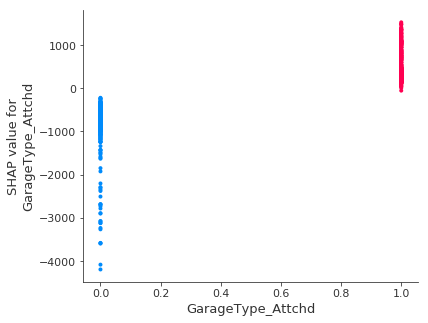

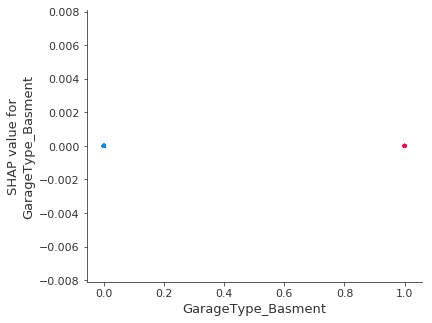

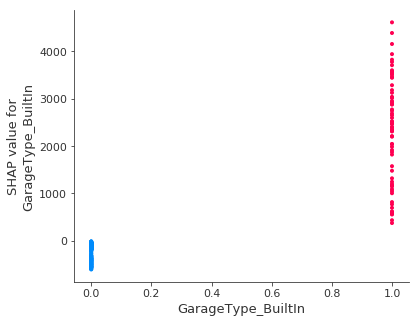

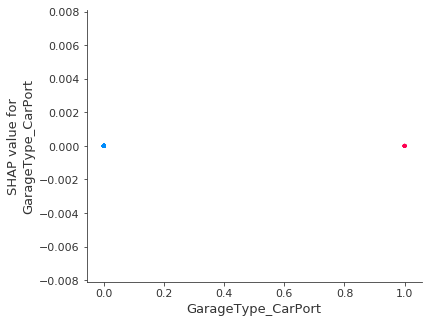

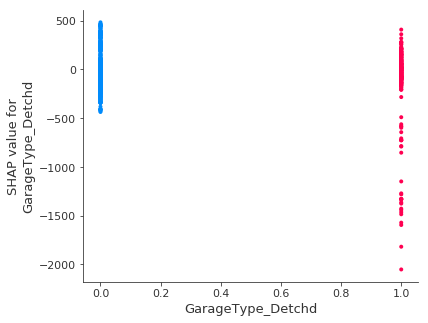

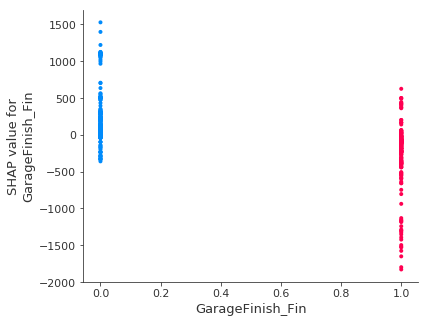

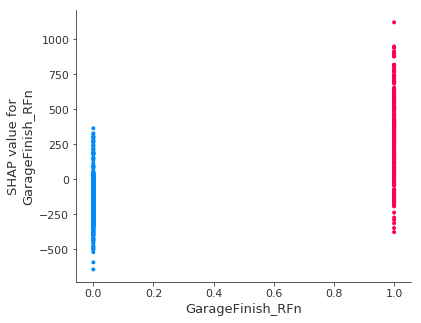

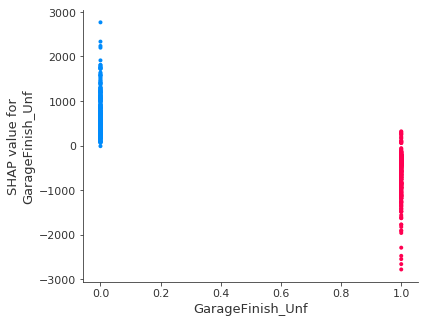

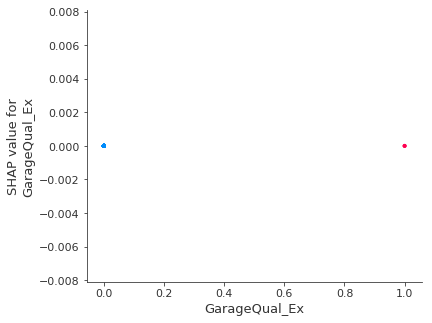

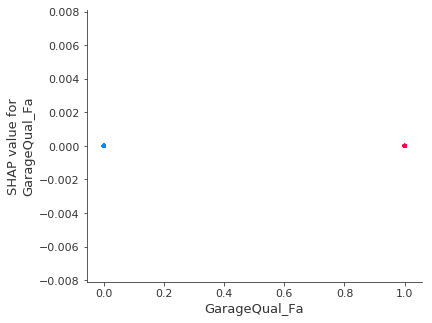

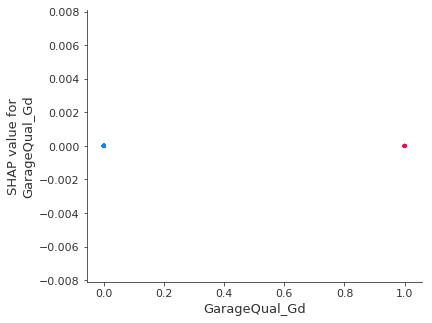

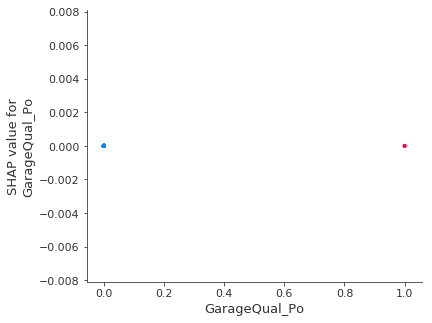

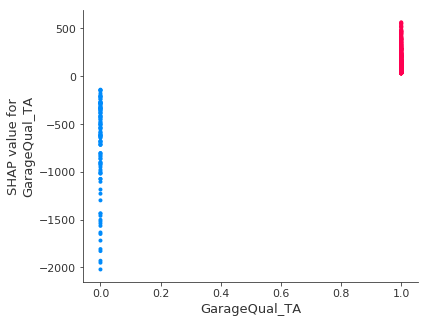

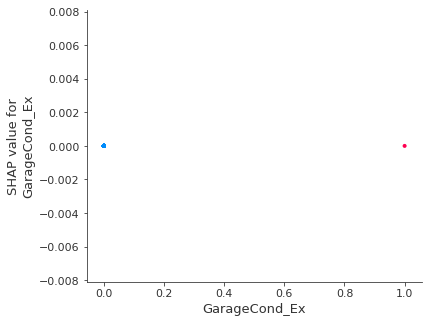

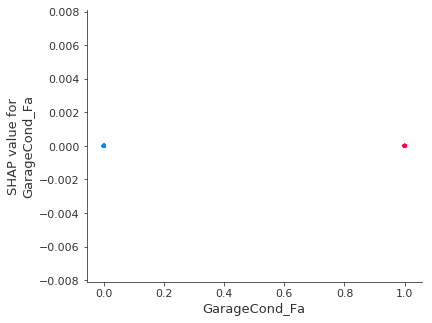

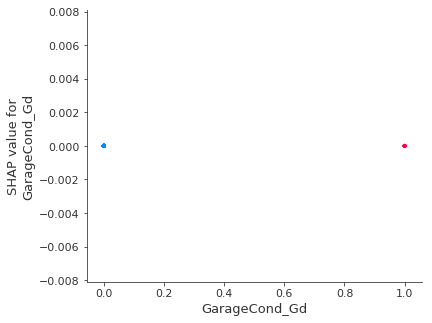

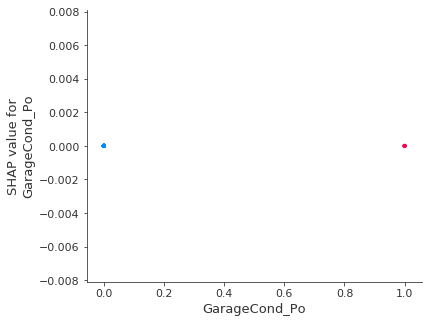

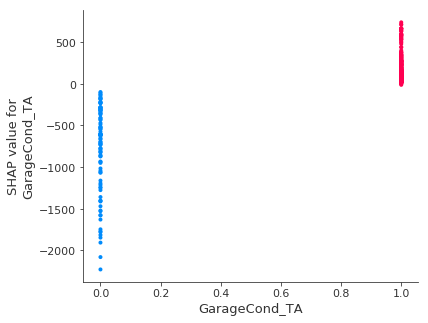

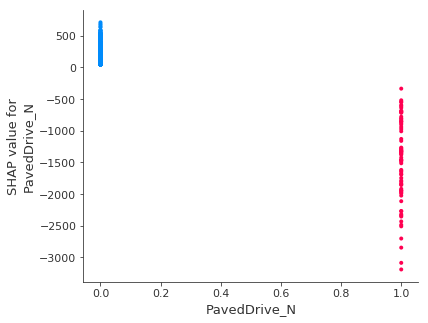

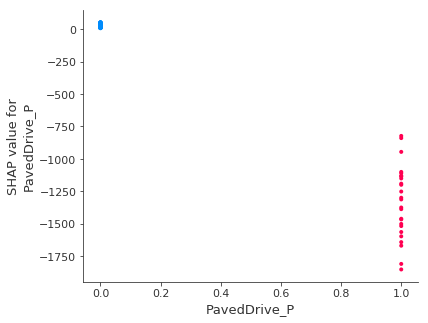

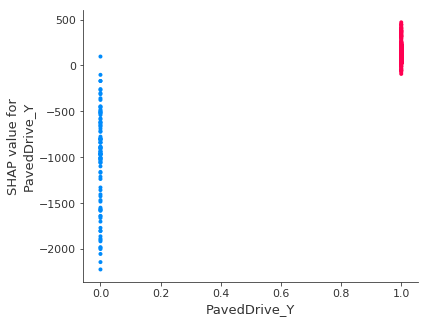

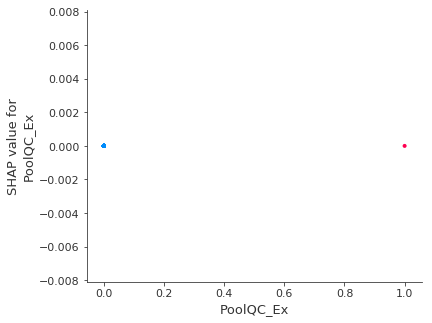

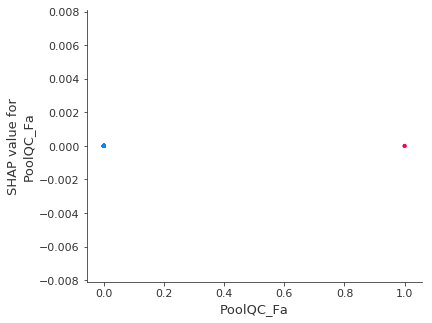

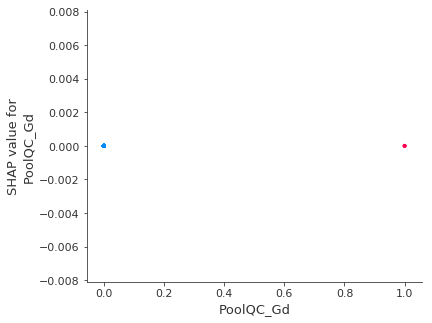

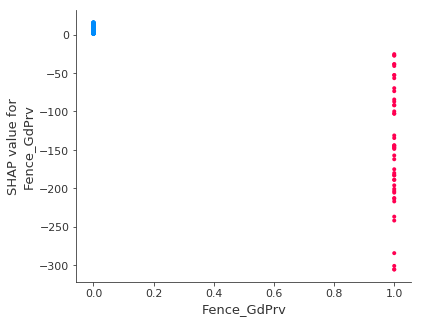

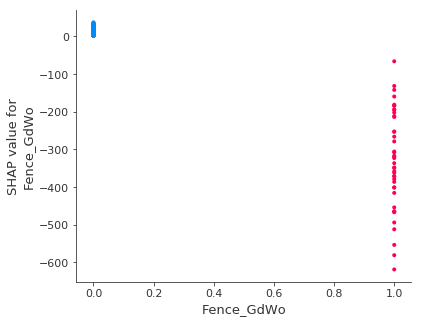

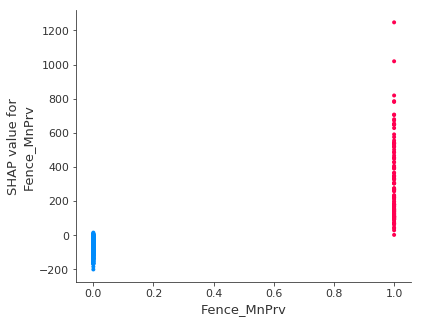

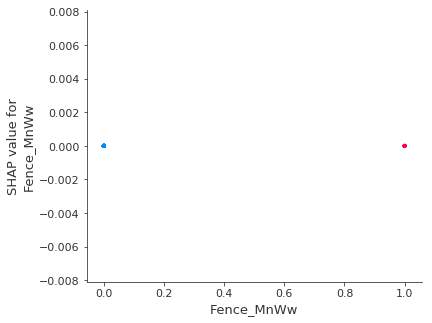

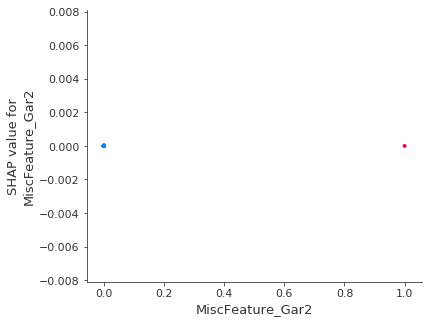

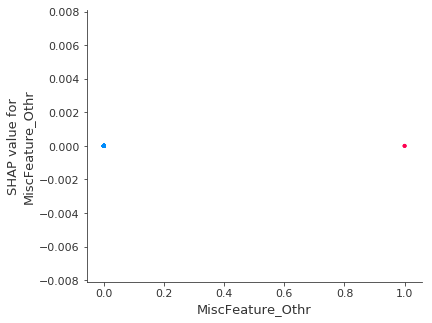

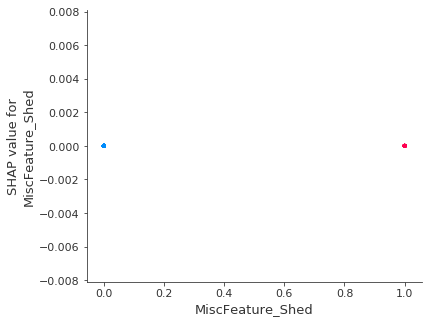

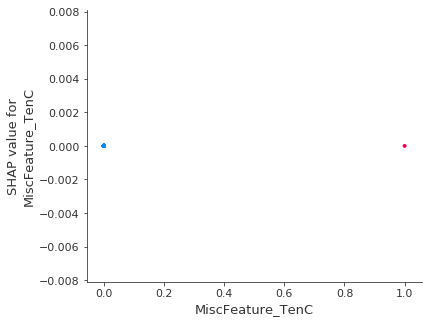

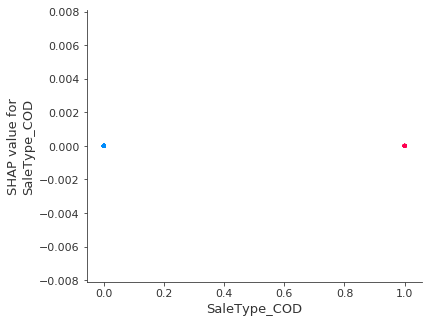

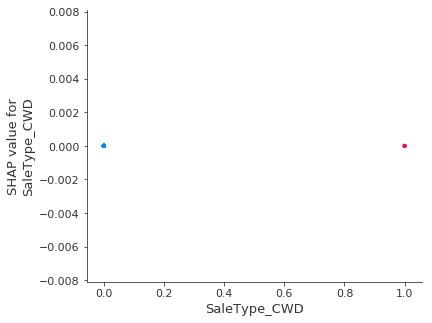

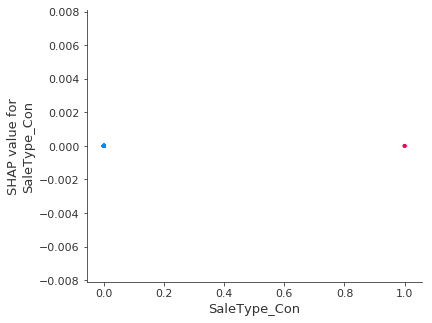

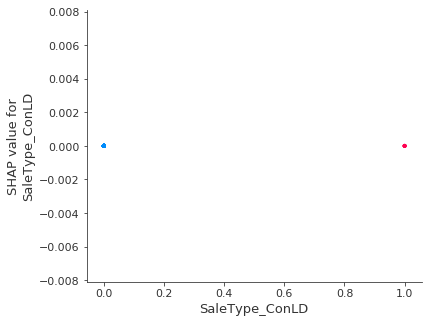

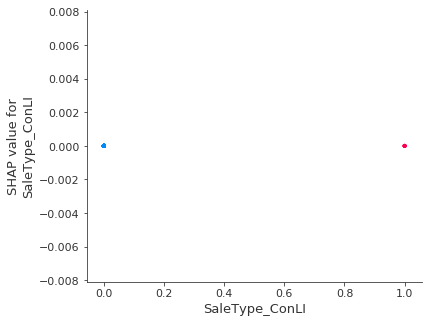

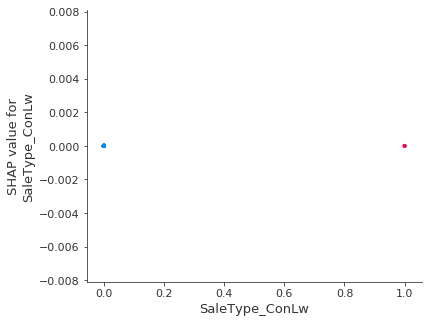

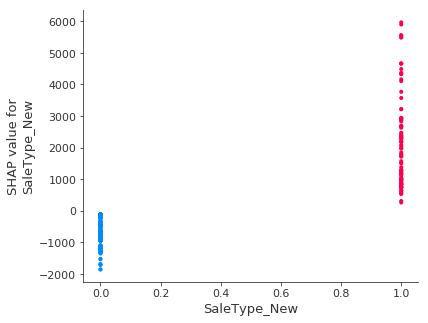

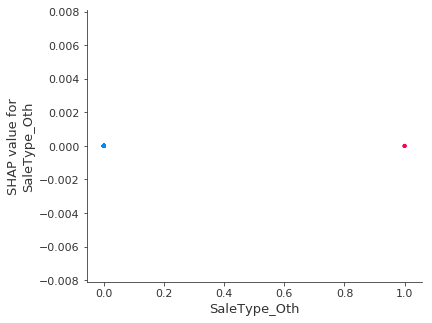

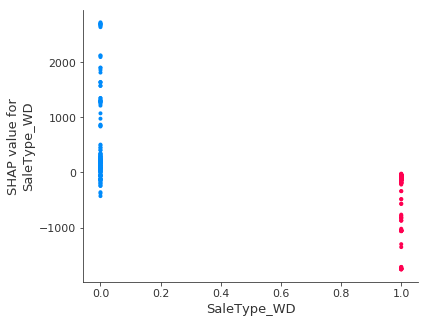

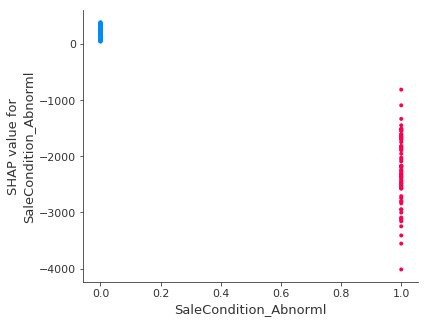

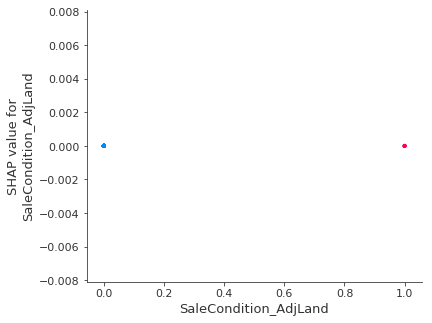

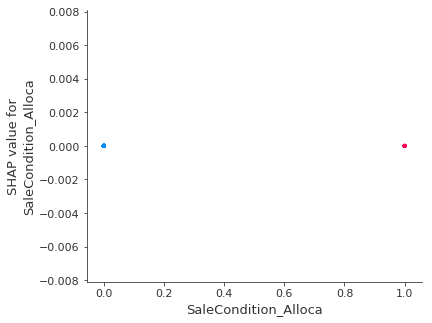

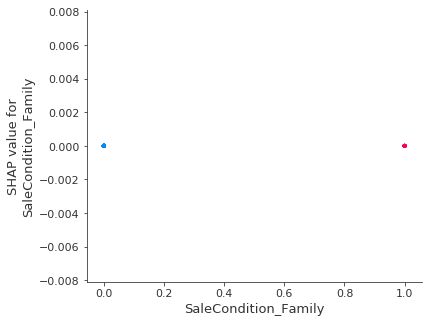

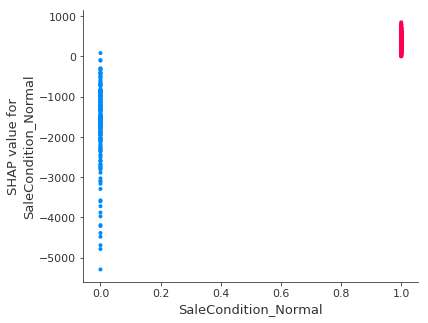

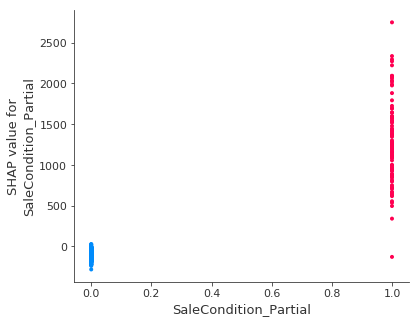

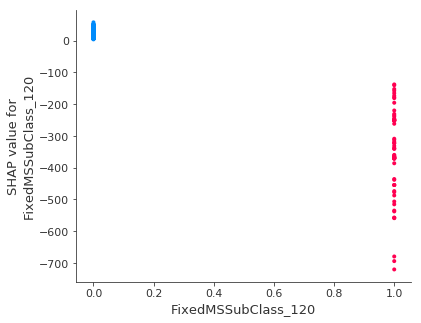

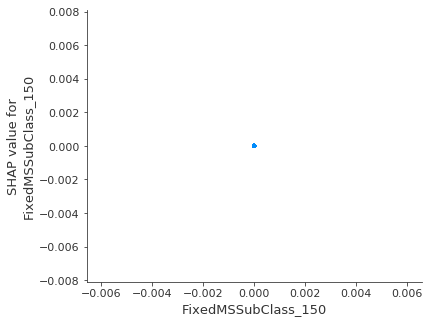

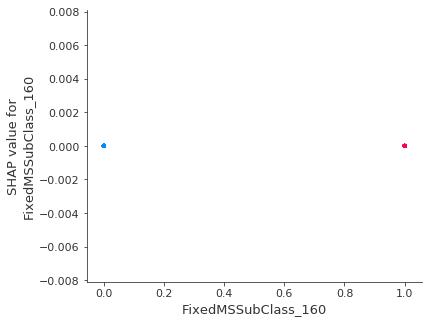

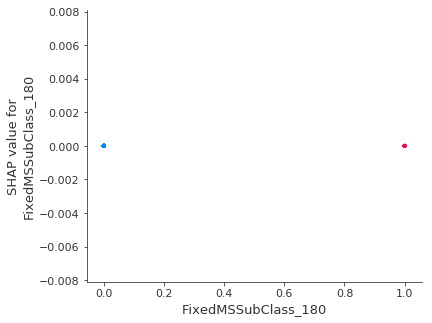

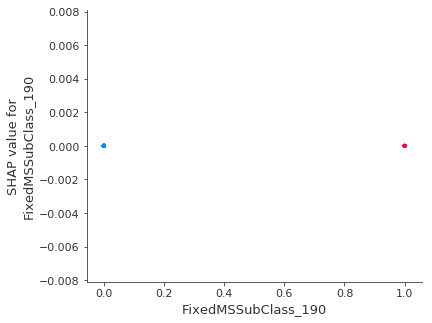

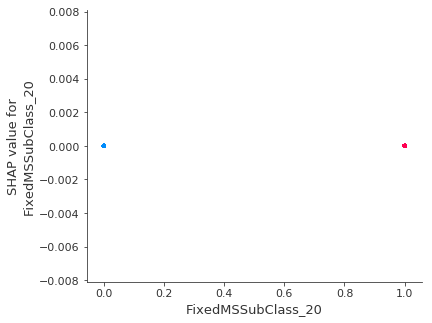

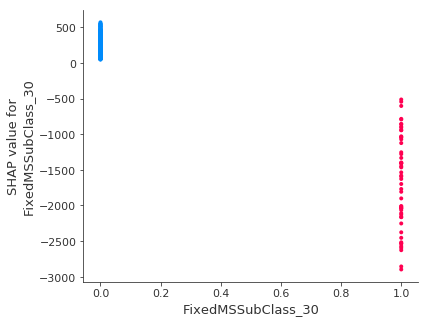

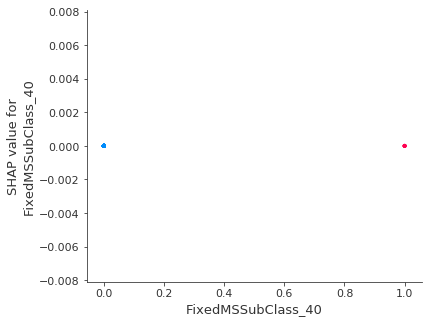

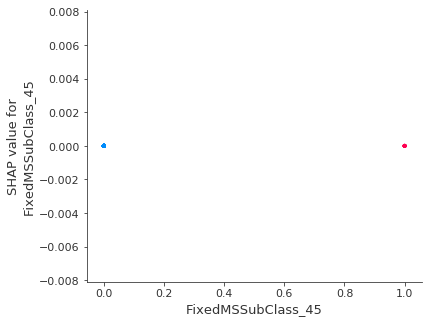

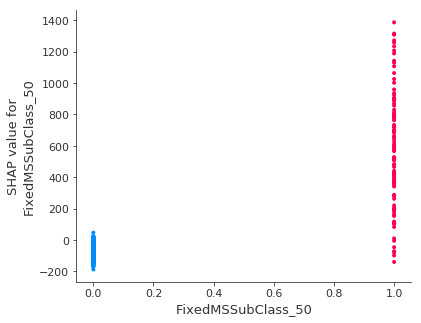

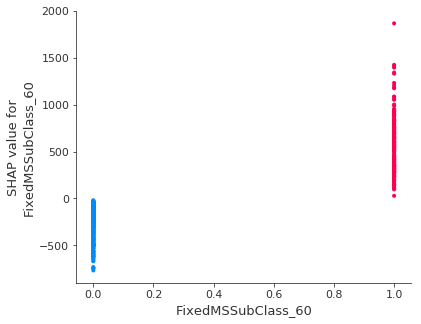

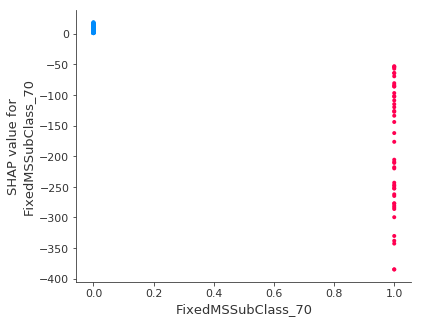

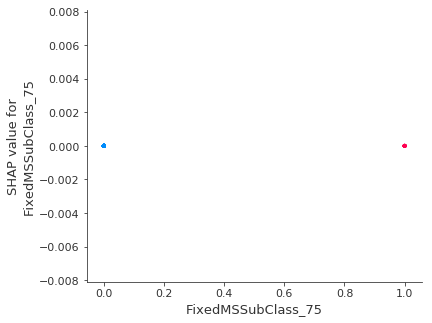

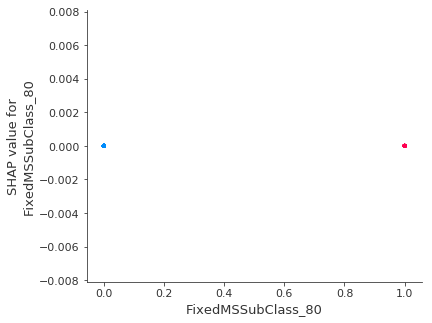

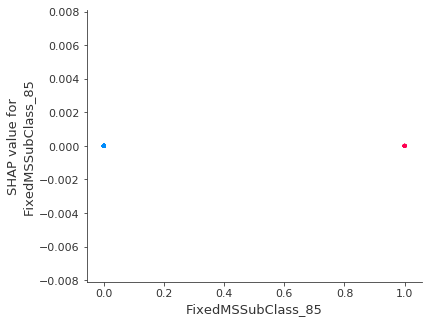

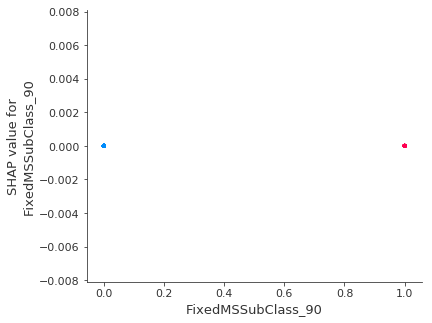

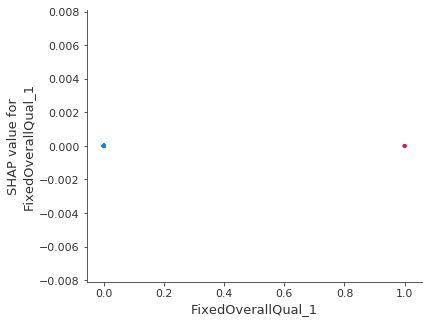

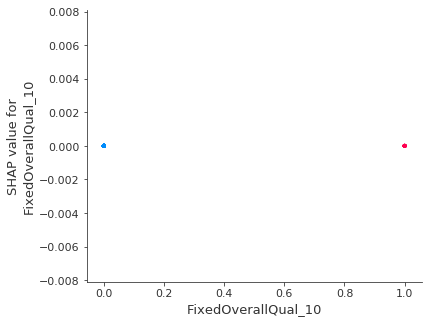

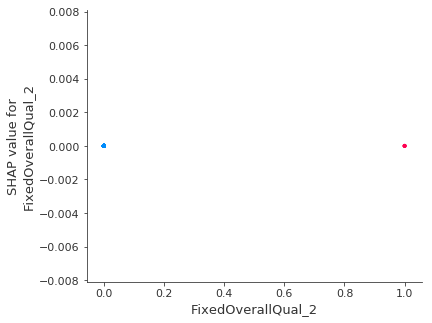

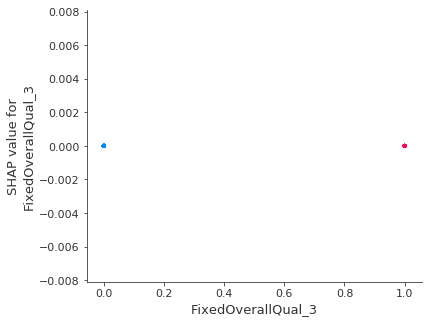

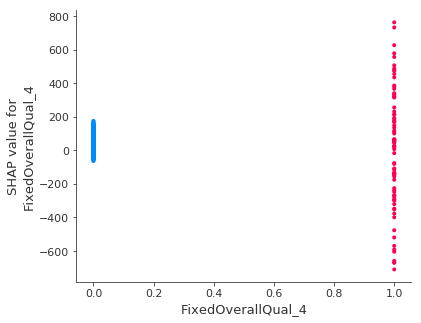

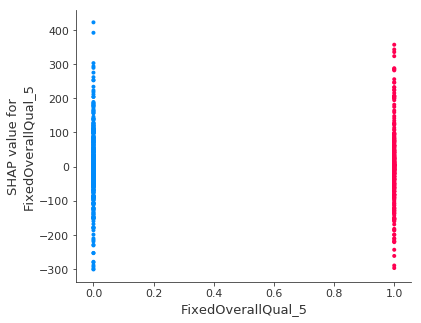

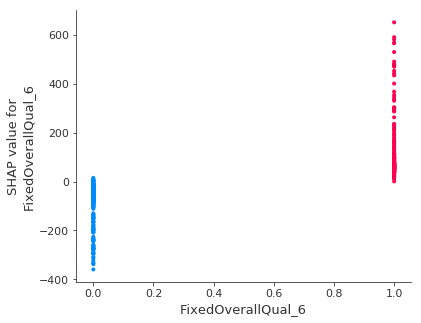

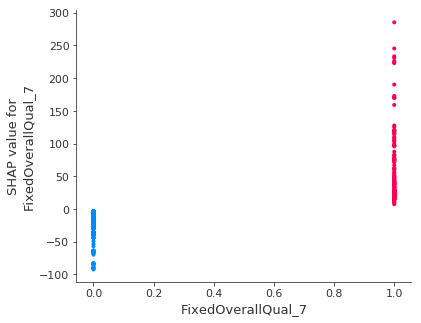

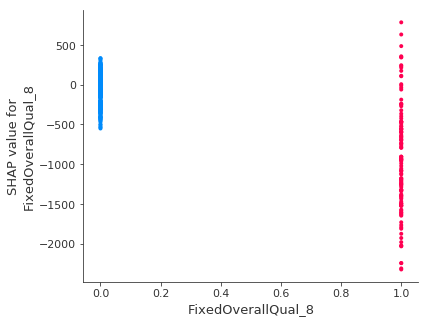

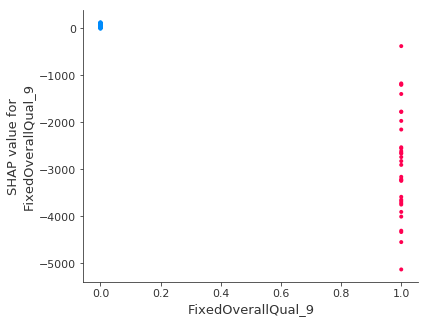

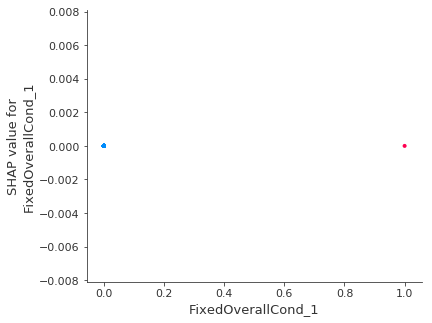

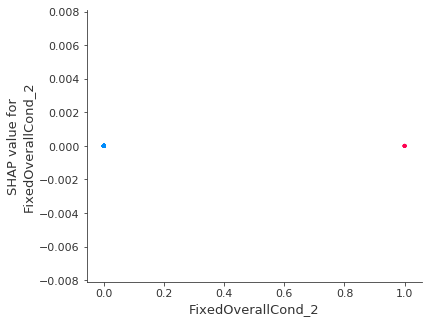

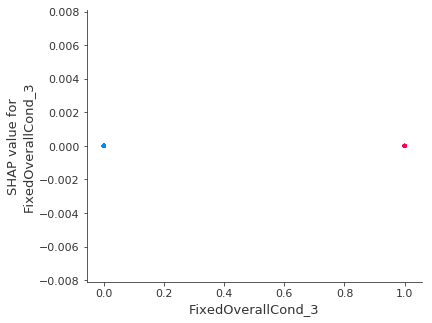

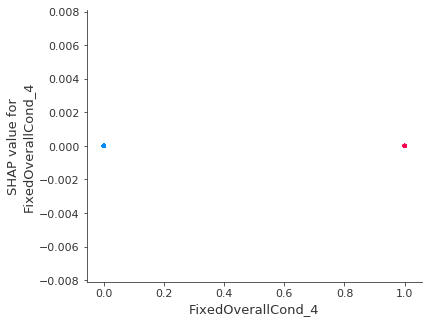

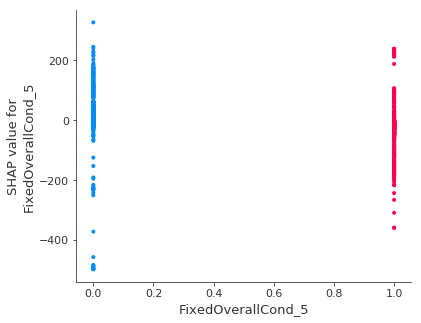

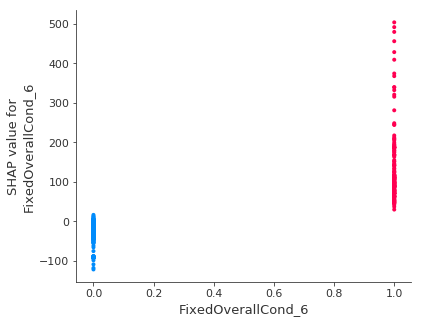

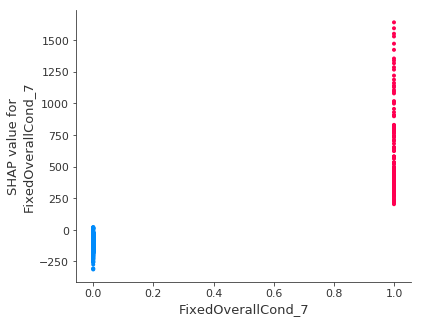

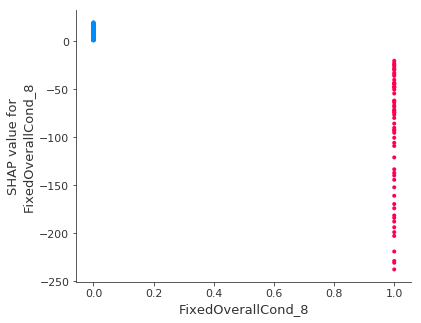

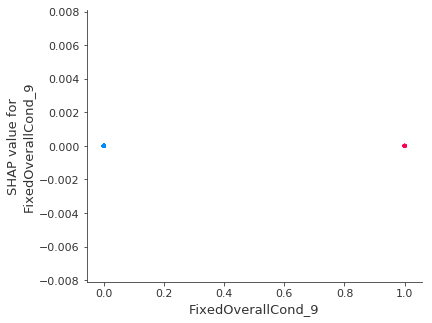

In [94]:
shap_tool.show_all_dependence_plot('regression')

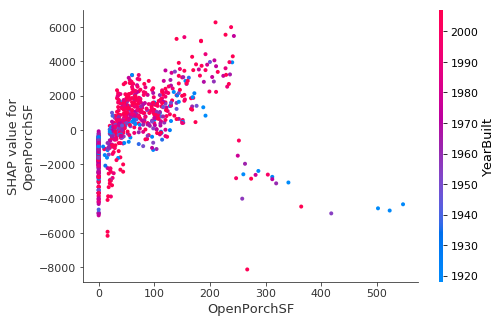

In [102]:
shap_tool.show_dependence_plot(type='regression', ind='OpenPorchSF', interaction_index='YearBuilt')